 # <font color="teal" >Statement:
- Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. It is a major problem to an organization, and predicting turnover is at the forefront of the needs of Human Resources (HR) in many organizations.

- Attrition has always been a major concern in any organization. The time, money and effort invested in training new employees, the work dependency and other factors leads to a massive overall loss to the firm when an employee leaves. Also, attrition causes distrust among existing employees which can itself become a major difficulty for the management of the organization.  Organizations face huge costs resulting from employee turnover. 

# <font color="teal" >Objective:
- Companies all over the world have been grappling with the challenges of retaining talent andmanaging loss through attrition, such as retirement or existing employees resigning fromtheir current positions. 
- Employee attrition can result in a potential loss of projects or workflow of a specific project at a company, causing an imbalance in human resource planning and a loss of team harmony and social purposes. 
- The research work's goal is to investigate various factors such as salary, growth opportunities, facilities, policies, procedures, recognition, appreciation, and suggestions that will aid in determining the attrition rate in organizations and factors related to their retention. 

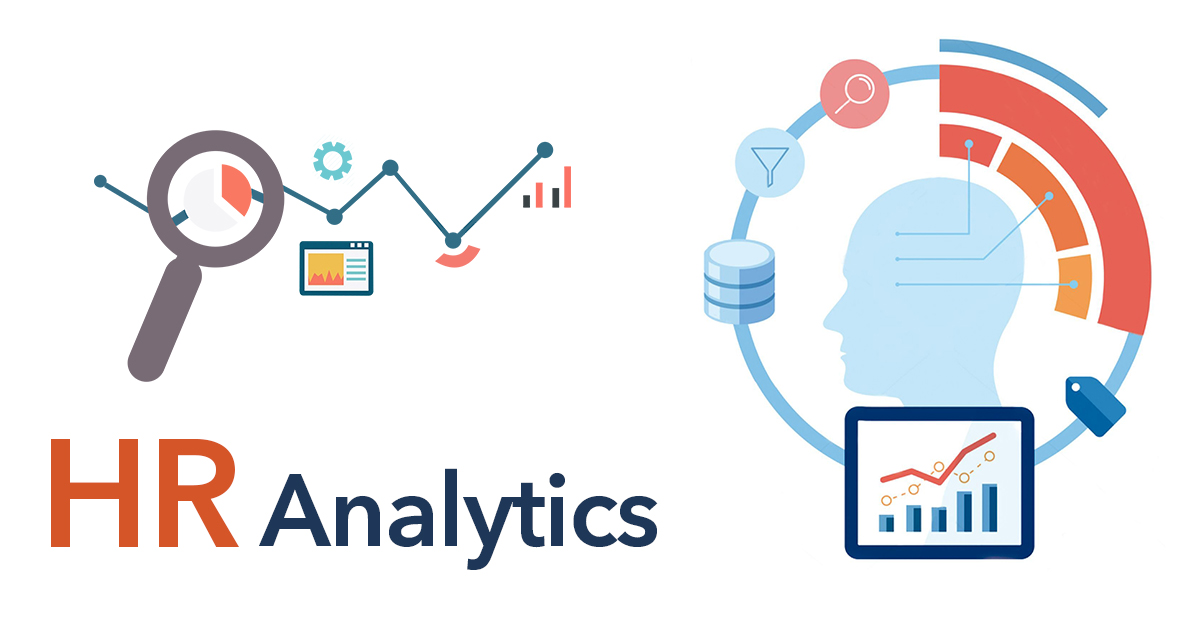

# <font color="teal" >Dataset:
- The Attrition dataset had **1470 observations with 35 variables.**

**Dependent Variable :** Attrition

**Independent Variable** (34 different variables in total) :

**Basic Info:**
Age, Gender, Education, Education Field, Martial Status, Distance From Home

**Work Info:**
Department, Job Role, Job Level, Over Time, Business Travel, Performance Rating, Stock Option Level, Job Involvement

**Satisfaction:**
Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction

**Salary Related:**
Monthly Income, Monthly Rate, Daily Rate, Hourly Rate, Percent Salary Hike

**Time Related:**
Total Working Years,Traning Time Last Year,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Current Manager,Num Companies Worked

# <font color="teal" >Importing Libraries

In [1]:
#Data manipulation
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score

#machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix ,roc_auc_score ,f1_score 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier 

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)


In [2]:
df=pd.read_csv(r"C:\Users\Anik8\Desktop\HR_Data.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- **There are No Missing values in the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# <font color="teal" > Univariate Analysis

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- **Data is imbalanced**

- **Unique values of Attributes**

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Observation:
<font color=green>**Dropping columns that have no uniqueness in attributes & Removing non-unique Features**</font>

Invariability in the Data point:

Certain variables do not have any variability in them. Such variables are:

- **Employee Count**: This is just a count of employee and the value it takes is always 1.
- **Over18**: This variable describes if an employee is over 18 years of age. It takes the value ‘Yes’ in all cases.
- **StandardHours**: The standard number of hours an employee works in a week. Its constant value is 80
- **EmployeeNumber**: All employee have unique value(Indexing). 

In [10]:
df=df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1)

In [11]:
df3=df.copy()

<AxesSubplot: >

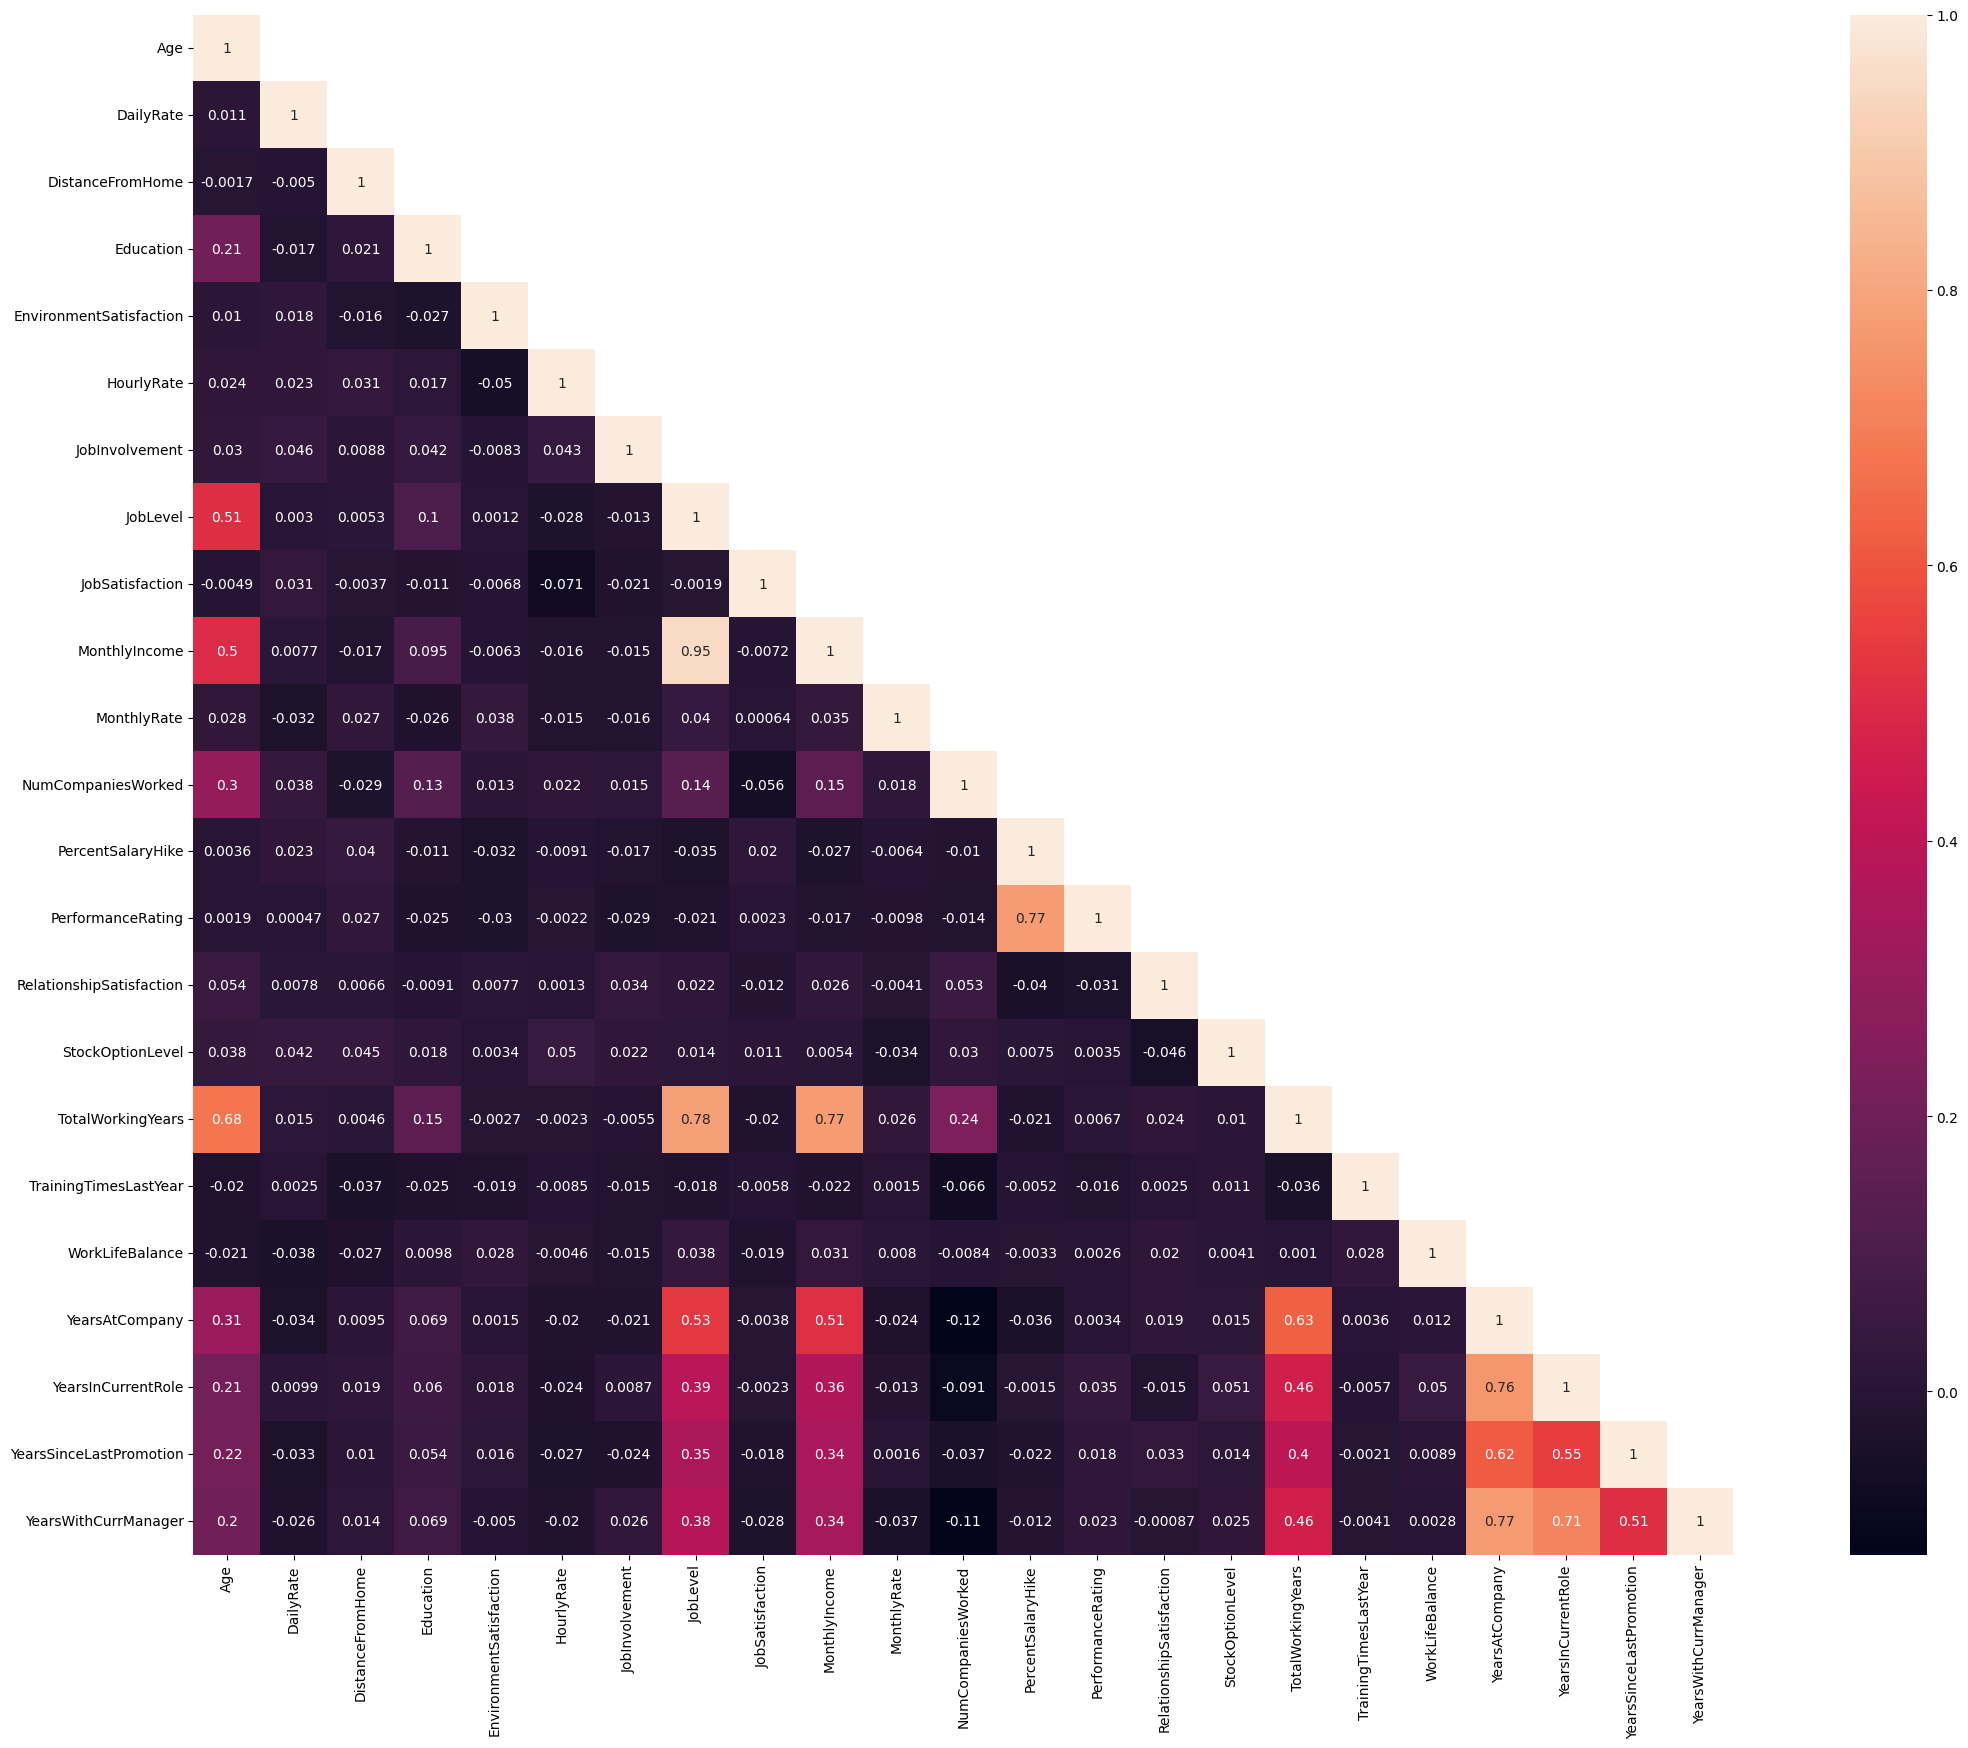

In [12]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [13]:
df_=df.copy()

In [14]:
df_[['Attrition']]=df_[['Attrition']].apply(LabelEncoder().fit_transform)

In [15]:
df_.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [16]:
# correlation of column with target column
df_.corr()["Attrition"].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
Attrition                   1.000000
Name: Attrition, dtype: float64

- **Plot for Correlation matrix**

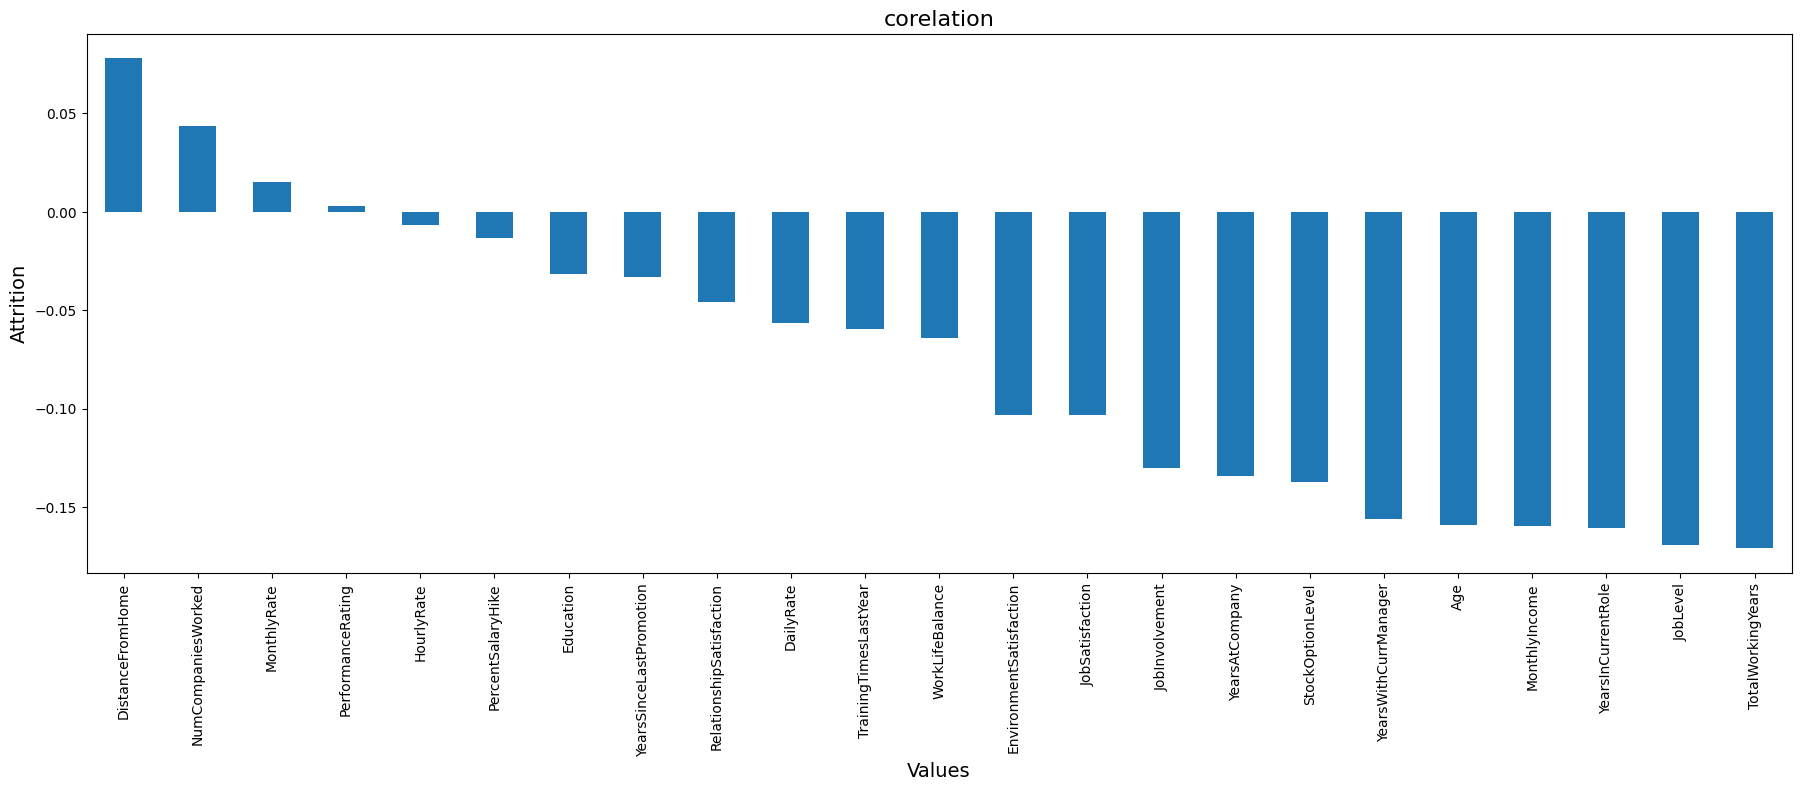

In [17]:
plt.figure(figsize=(22,7))
df_.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel('Values',fontsize=14)
plt.ylabel('Attrition',fontsize=14)
plt.title('corelation',fontsize=16)
plt.show()

- <font color=#006699> Each   cell   in   the   table   shows   the correlation between two variables. 

- From the correlation plot, we can deduce that:- 

- Attrition has a negative correlation with monthly income, total working years,stock   option   level,   years   at   company,   years   in  a   current  role,   years   withcurrent manager, job satisfaction, job involvement, environment satisfactionand age.

- Attrition has a positive correlation only with over time, Marital status, and Distance from Home.- 

- There   is   a   high   correlation   between   Percent   salary  hike   and   performancerating as well as job Level and monthly income.
- Years at company, years in current role, years since last promotion, yearswith current manager, total working years, monthly income and job level are also correlated significantly.
- **Positive correlation:** OverTime, MaritalStatus, DistanceFromHome, JobRole, Department, NumCompaniesWorked, Gender, EducationField ,PerformanceRating
- **Negative correlation:** TotalWorkingYears, JobLevel,YearsInCurrentRole , MonthlyIncome,Age ,StockOptionLevel, YearsAtCompany, JobInvolvement, JobSatisfaction,Stockoptionlevel, EnvironmentSatisfaction, WorkLifeBalance, TrainingTimesLastYear, DailyRate, RelationshipSatisfaction, YearsSinceLastPromotion, Education, PercentSalaryHik, HourlyRate

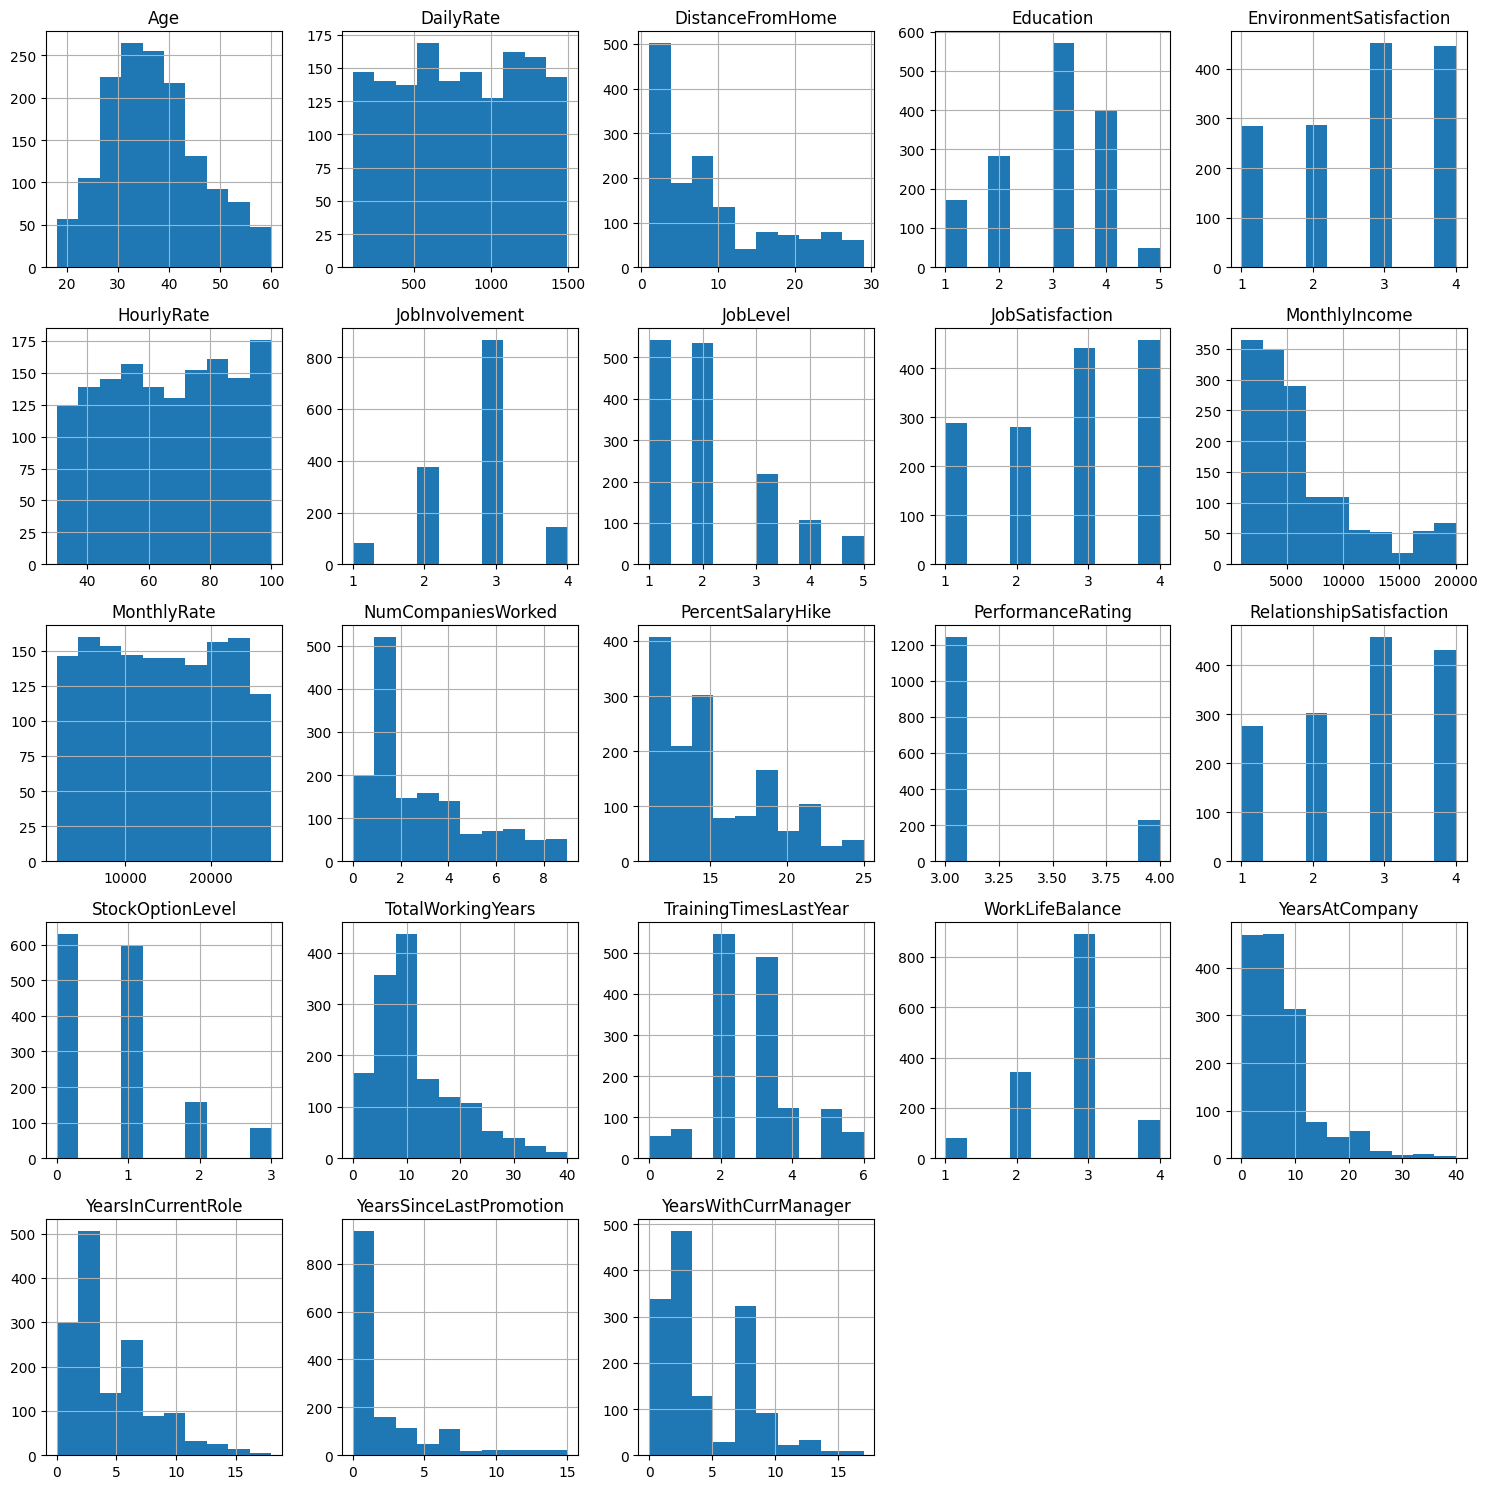

In [18]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [19]:
# skewness
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

- <font color=#006699> Most distributions are right- skewed(Monthly Income , Total working years , years at company  , Distance From Home , etc)
-  The age feature is a little right skewed, and most of the **employees have ages between 25-40 Years.**
- **Observation:**

- 1. From the above distribution plot we can infer that the Age column seems to be normal and there is no skewness in this column. 
- 2. The columns **DailyRate, HourlyRate and MonthlyRate are almost normally distributed** and these columns have no skewness.
Apart from the above mentioned columns, none of the columns are normally distributed and all of them are skewed.

# <font color="teal" > Exploratory Data Analysis

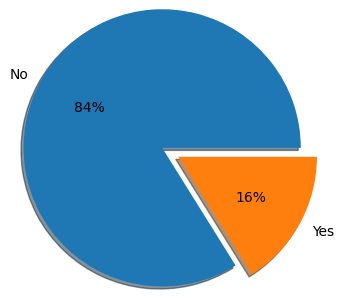

In [20]:
#Attrition
plt.figure(figsize=(3,3))
overall_attrition = df.groupby('Attrition')['Attrition'].count()
plt.pie(overall_attrition, explode=[0.0, 0.2], labels=['No', 'Yes'], radius=1.5, autopct='%1.0f%%',shadow=True);

- <font color=#006699> From the Pie Chart, we can infer that out of **1470 employees, 16%** of the employees left their job due to some reasons whereas other **84% of the employees preferred to continue** their job at the company

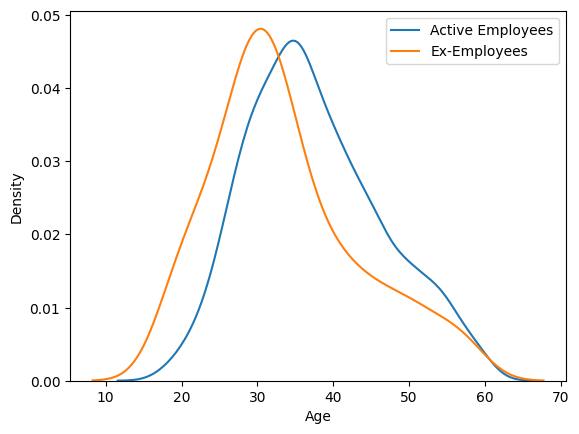

In [21]:
#Age
sns.kdeplot(df.loc[df['Attrition'] == 'No','Age'],label = 'Active Employees')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes','Age'],label = 'Ex-Employees')

plt.legend()
plt.show()

- <font color=#006699> Ex-Employees have an average **age of 33.5 years , while the current employees have 37.5 years** . A younger employee is more likely to leave a company, and the education and marital status paramters are potential support.

<AxesSubplot: xlabel='Department', ylabel='No of Employees'>

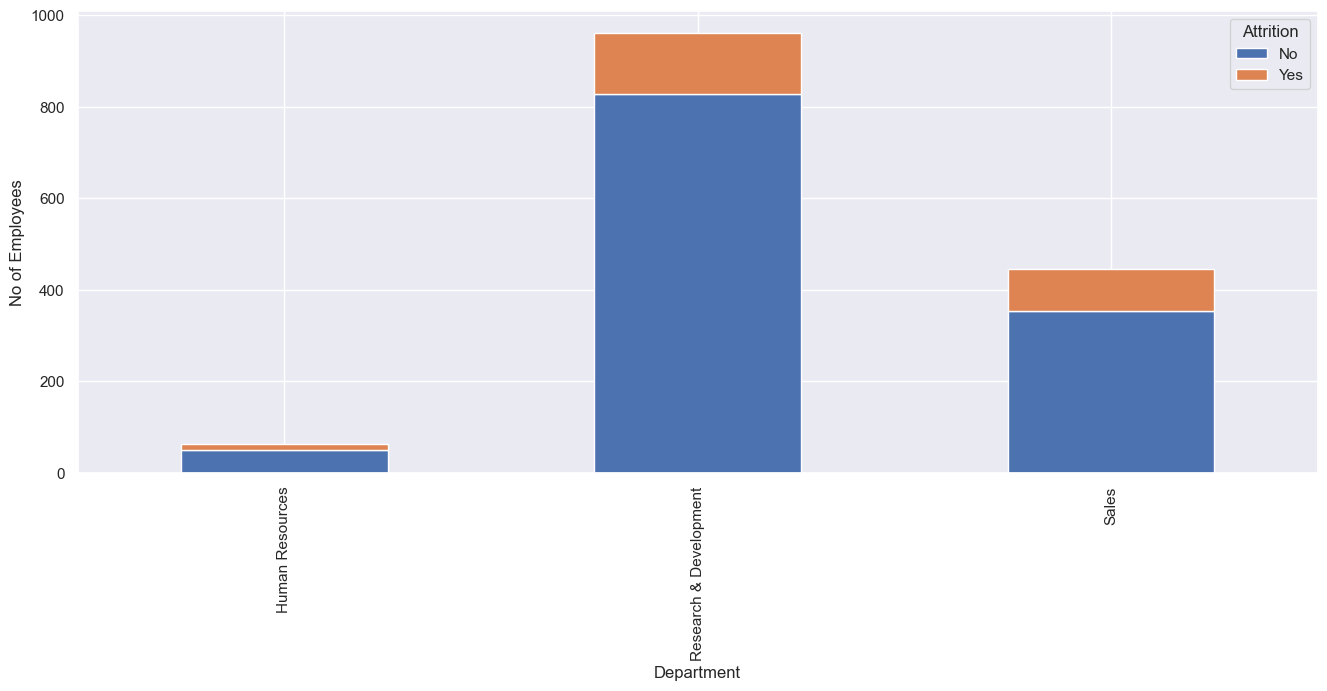

In [23]:
#Department
department_data = df[['Attrition', "Department"]].groupby(['Department', 'Attrition']).size()
department_data = department_data.unstack()
department_data.plot(kind = 'bar',stacked = True,xlabel ='Department',ylabel ='No of Employees')

In [24]:
department_data

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


<AxesSubplot: ylabel='Sales'>

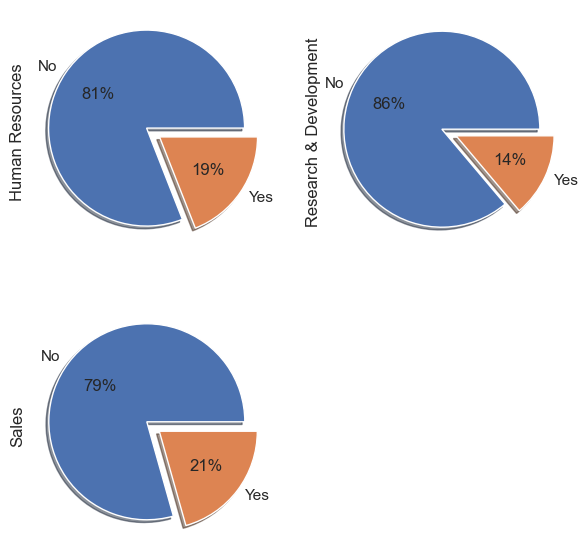

In [25]:
explode=[0.08]*2
fig = plt.figure(figsize=(7,7)) 
fig_dims = (2, 2)

plt.subplot2grid(fig_dims, (0, 0))
department_data.iloc[0].plot.pie(autopct='%1.0f%%',explode=explode,shadow=True)

plt.subplot2grid(fig_dims, (0, 1))
department_data.iloc[1].plot.pie(autopct='%1.0f%%',explode=explode,shadow=True)

plt.subplot2grid(fig_dims, (1, 0))
department_data.iloc[2].plot.pie(autopct='%1.0f%%',explode=explode,shadow=True)

-<font color=#006699> **Sales Department has more Attrition rate than others**

--------------------------------------------------------------------------

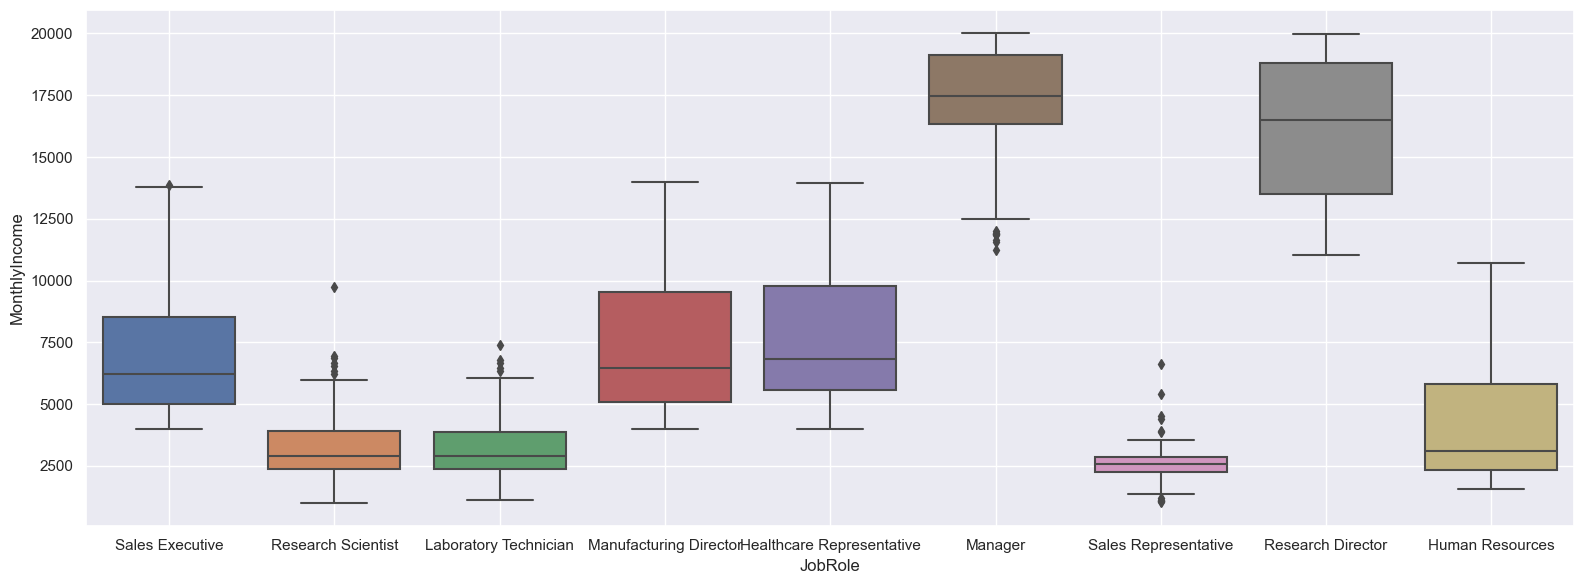

In [27]:
#job Role
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(y=df['MonthlyIncome'],x=df['JobRole'])
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

- <font color=#006699> **Managers and Research directors** earn a relatively **large sum** . Intuitively, the attrition must have an inverse relationship with the monthly income paramter
- **Research Scientist, lab Technicians and Sales Representive positions are not well paid**. such factors would lead to attrition in these departments.

In [28]:
#Attrition among different departments

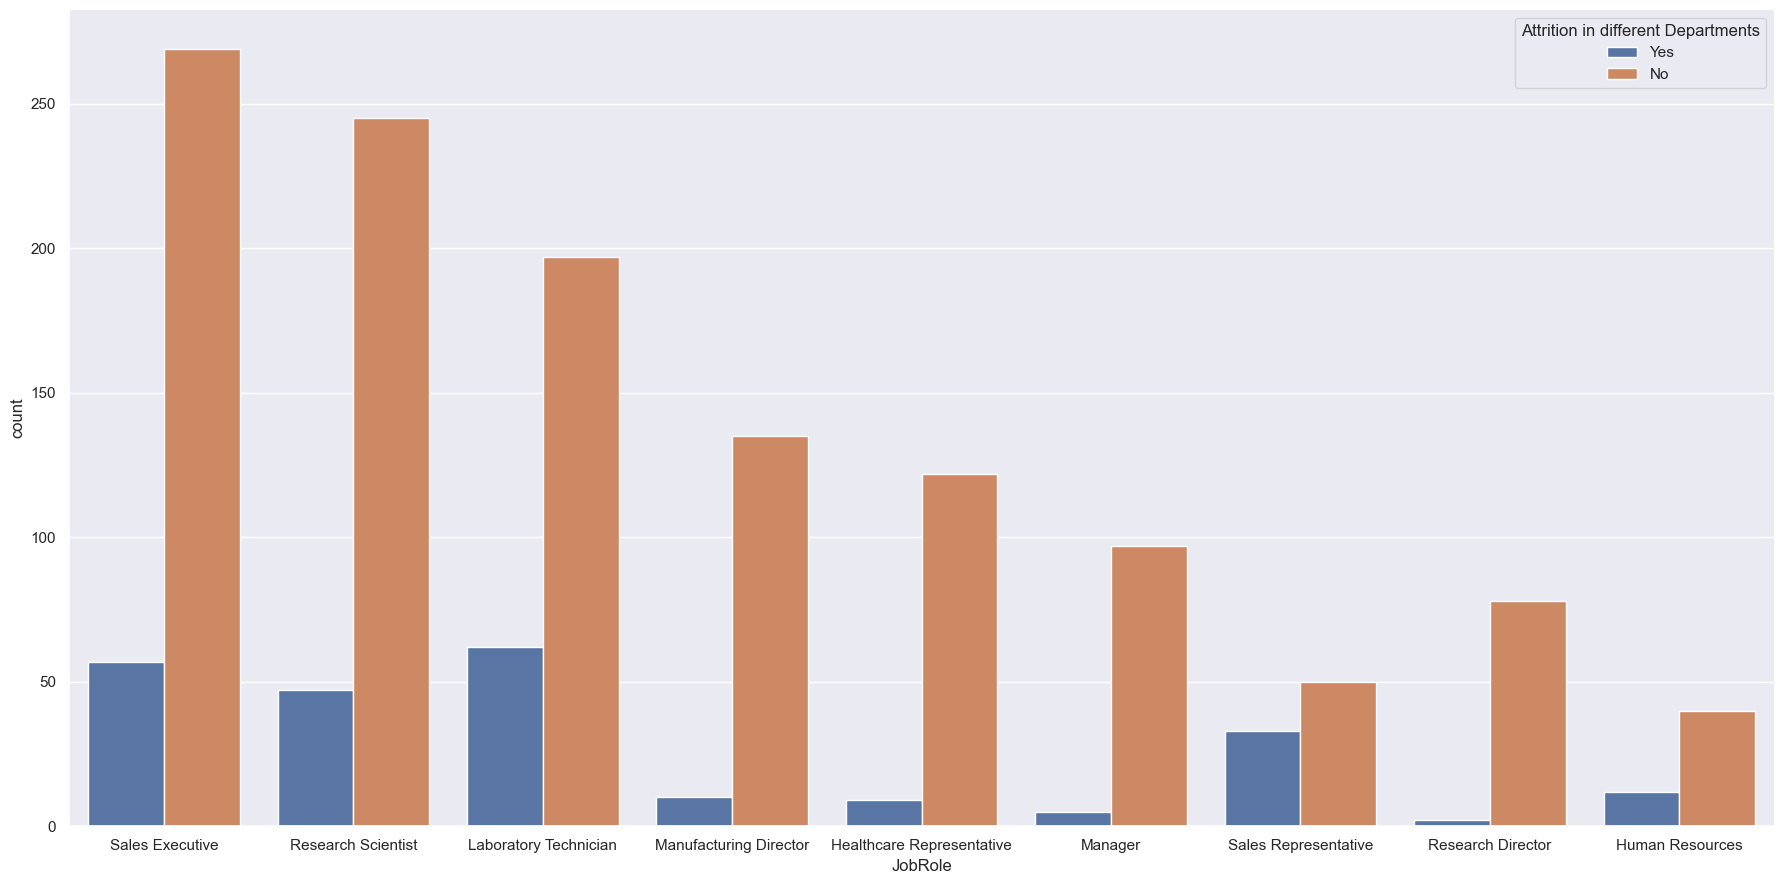

In [29]:
sns.catplot(x='JobRole',hue='Attrition',data=df,kind='count',height=9,aspect=2,legend=False)
plt.legend(loc='upper right',title='Attrition in different Departments')
plt.tight_layout()
plt.show()

- <font color=#006699> As expected, Research Scientist, Lab Technicians and Sales representatives have high attrition in their department, whereas Managers and Research Directors hve little attrition.
- Low Monthly Income is one piece of evidence that supports a high attrition.

---------------------------

-  <font color=#006699>**Analysis of the Rating Features**

- JobSatisfaction
- EnvironmentSatisfaction
- RelationshipSatisfaction
- JobInvolvement
- WorkLifeBalance
- PerformanceRating

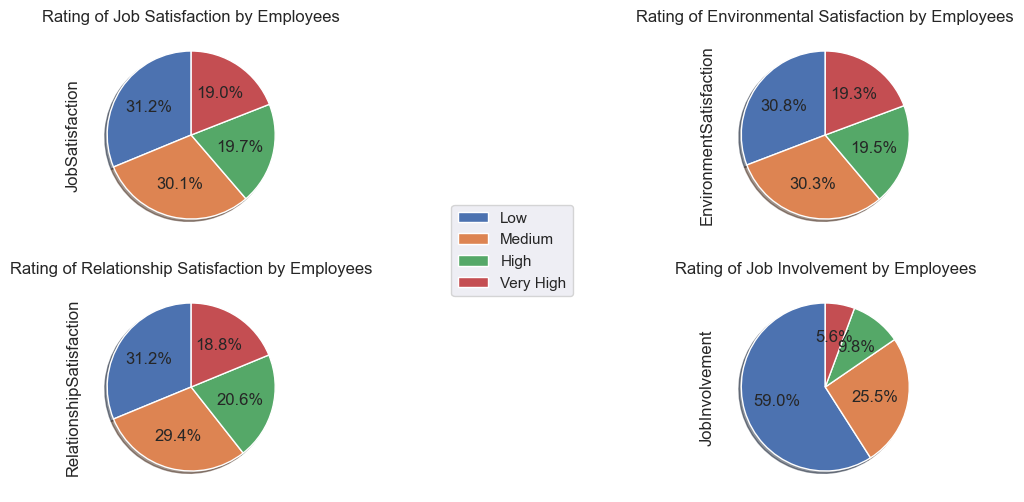

In [30]:

fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

- <font color=#006699> **From the subplot, we can infer that more than 60% of the employees are :**

-     Not Satisfied in their Job
-     Not Satisfied with their Work Environmnet
-     Not Satisfied in their Relationship
-     Not Getting involved in their job

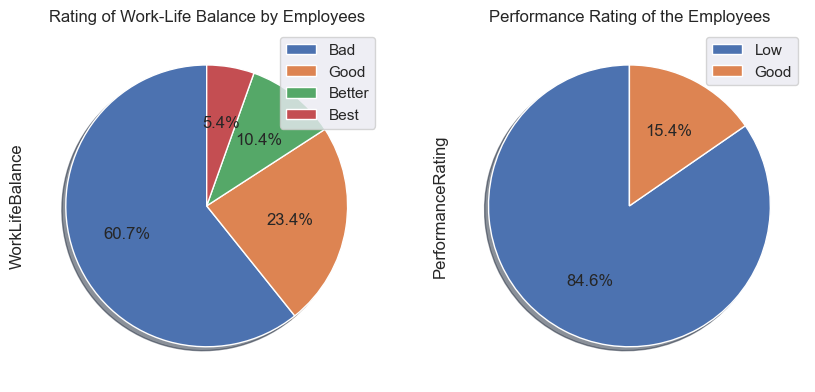

In [31]:
# explode=[0.02]*3 

fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%',
                            
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                           
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

- <font color=#006699> **From the above piecharts, we can see that:**

- Almost 60% of the employees have rated their Work-life Balance as Bad
- Almost 85% of the employees have a low performance rating

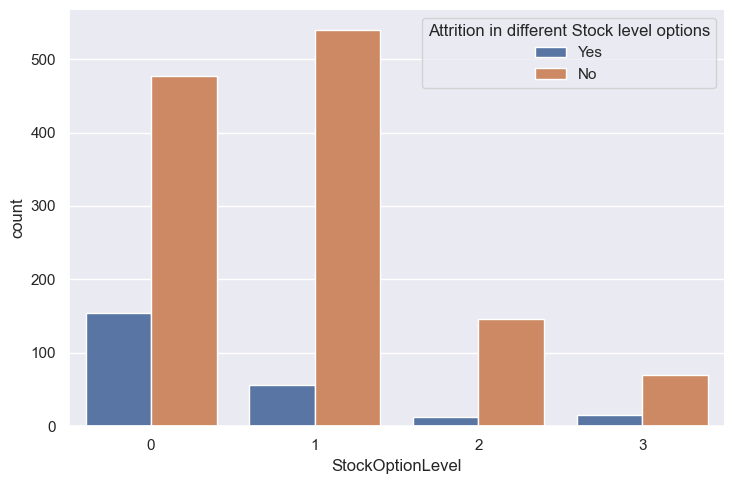

In [40]:
#Stockoptionlevel
sns.catplot(x='StockOptionLevel',hue='Attrition',data=df,kind='count',height=5,aspect=1.5,legend=False)
plt.legend(loc='upper right',title='Attrition in different Stock level options')
plt.tight_layout()
plt.show()

- <font color=#006699> The tendency of employees to **leave the organization is much more** when the stock availing options are limited. 
- Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity.

## <font color=green> Analysis of Business Travel Feature

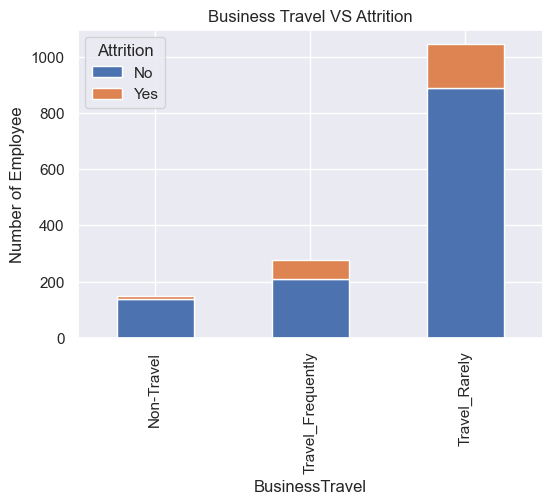

In [41]:
props = df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar',figsize=(6,4), alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

- <font color=#006699> **From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently.**

- Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interest

<AxesSubplot: xlabel='Attrition', ylabel='No of Employees'>

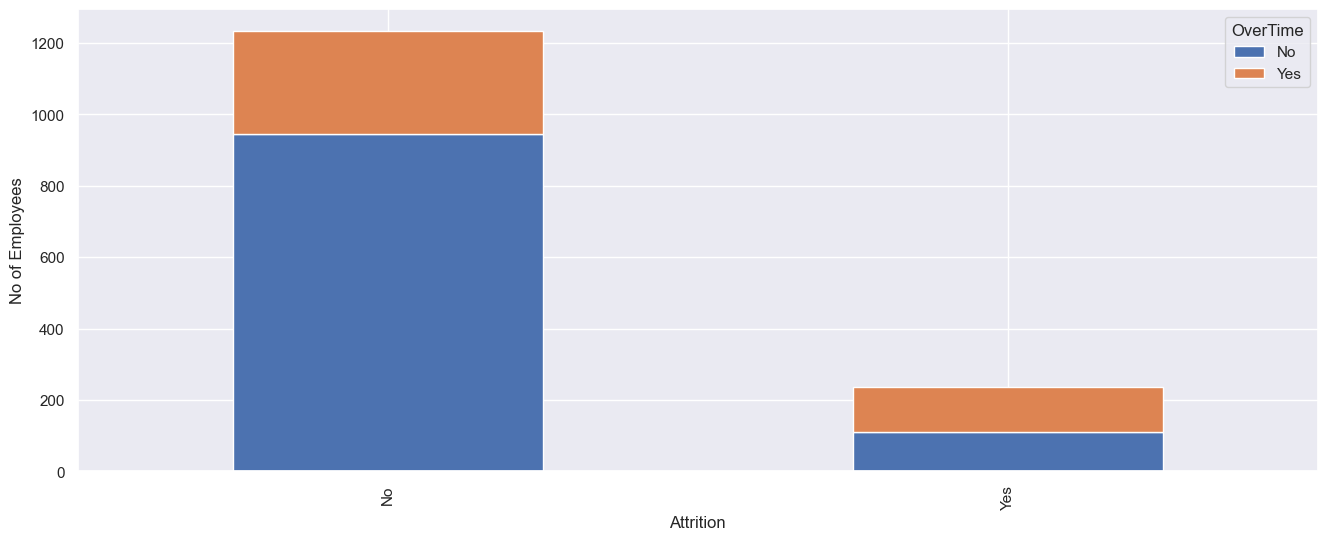

In [42]:
#Over time vs Attrition
overtime= df[['OverTime', "Attrition"]].groupby(['Attrition', 'OverTime']).size()
overtime = overtime.unstack()
overtime.plot(kind = 'bar',stacked = True,xlabel ='Attrition',ylabel ='No of Employees')

- **The ratio for overtime(YES) for Attrition (YES) is almost equal** which suggests over time can be factor for leaving an organization.

In [43]:
overtime

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


- <font color=#006699> **Analysis of Work Experience**
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- TotalWorkingYears

In [44]:
exp= df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
exp.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


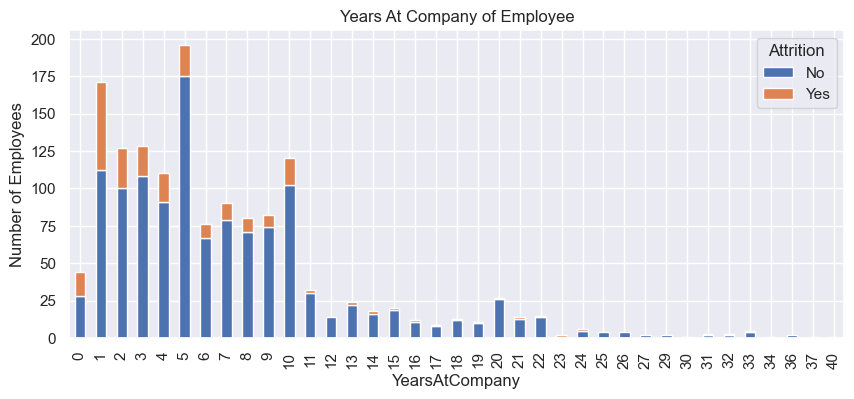

In [45]:
yac = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()
yac.plot(kind='bar', stacked='False',figsize=(10,4))
plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

-<font color=#006699>  It is observed that the **newly arriving employees quit their jobs most**,so more concern should be given to the freshers and their cause of leaving the company should be figured out

In [ ]:
ycr = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure()

ax0 = fig.add_subplot(121) 
ax1 = fig.add_subplot(122)  

ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0)
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) 
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

- <font color=#006699> **From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company mos**

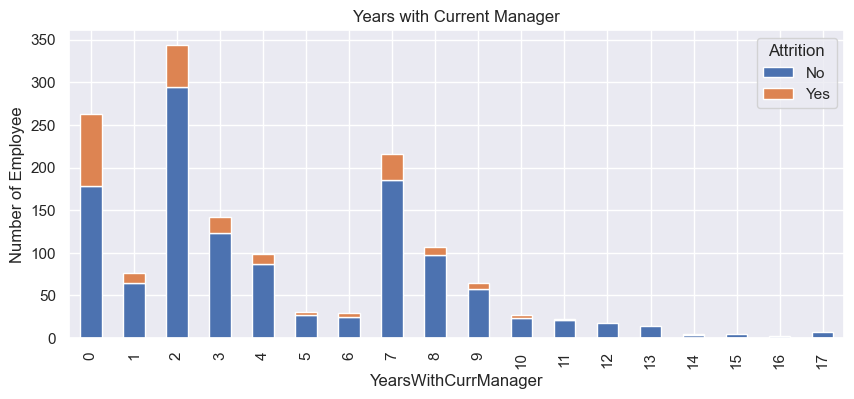

In [46]:
ycm = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()
ycm.plot(kind='bar', stacked='False',figsize=(10,4))
plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

In [ ]:
twy = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()
twy.plot(kind='bar', stacked='False',figsize=(10,4))
plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

- <font color=#006699> **It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start**

<AxesSubplot: xlabel='Gender', ylabel='No of Employees'>

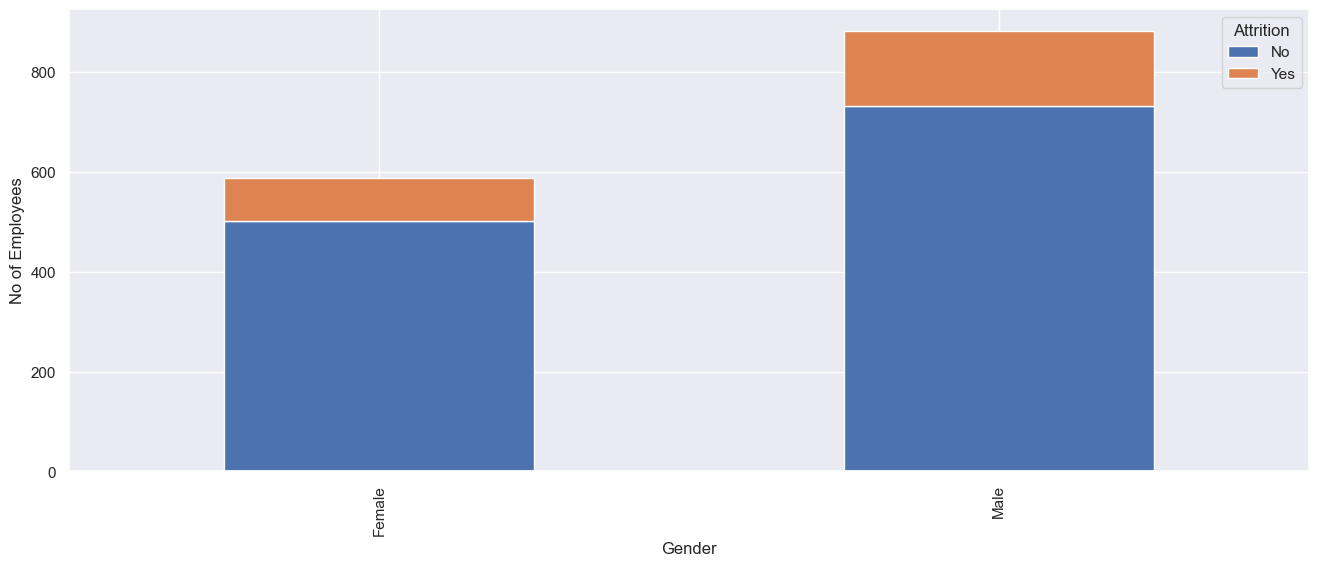

In [47]:
#Department
gender_att = df[['Attrition', "Gender"]].groupby(['Gender', 'Attrition']).size()
gender_att = gender_att.unstack()
gender_att.plot(kind = 'bar',stacked = True,xlabel ='Gender',ylabel ='No of Employees')

In [ ]:
gender_att

-<font color=#006699> **Male employees have more Attrition rate than feamle**

## <font color=green> Analysis of Marital Status

In [48]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

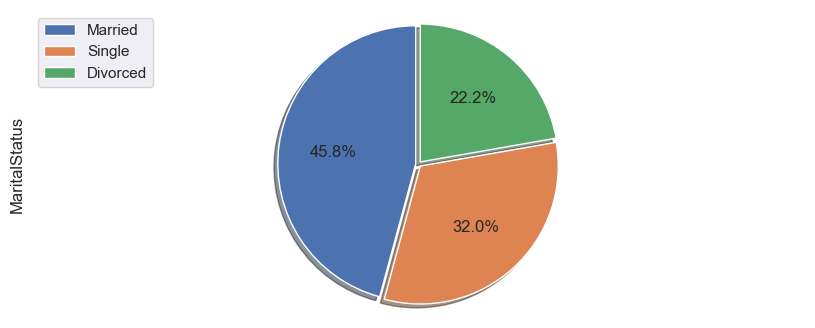

In [49]:
explode=[0.02]*3
df['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(10, 4),
                            autopct='%1.1f%%', 
                            startangle=90,
                            explode=explode,            
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left') 

In [50]:
msa = df.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


 - <font color=green>**Money impacts the employee attrition**

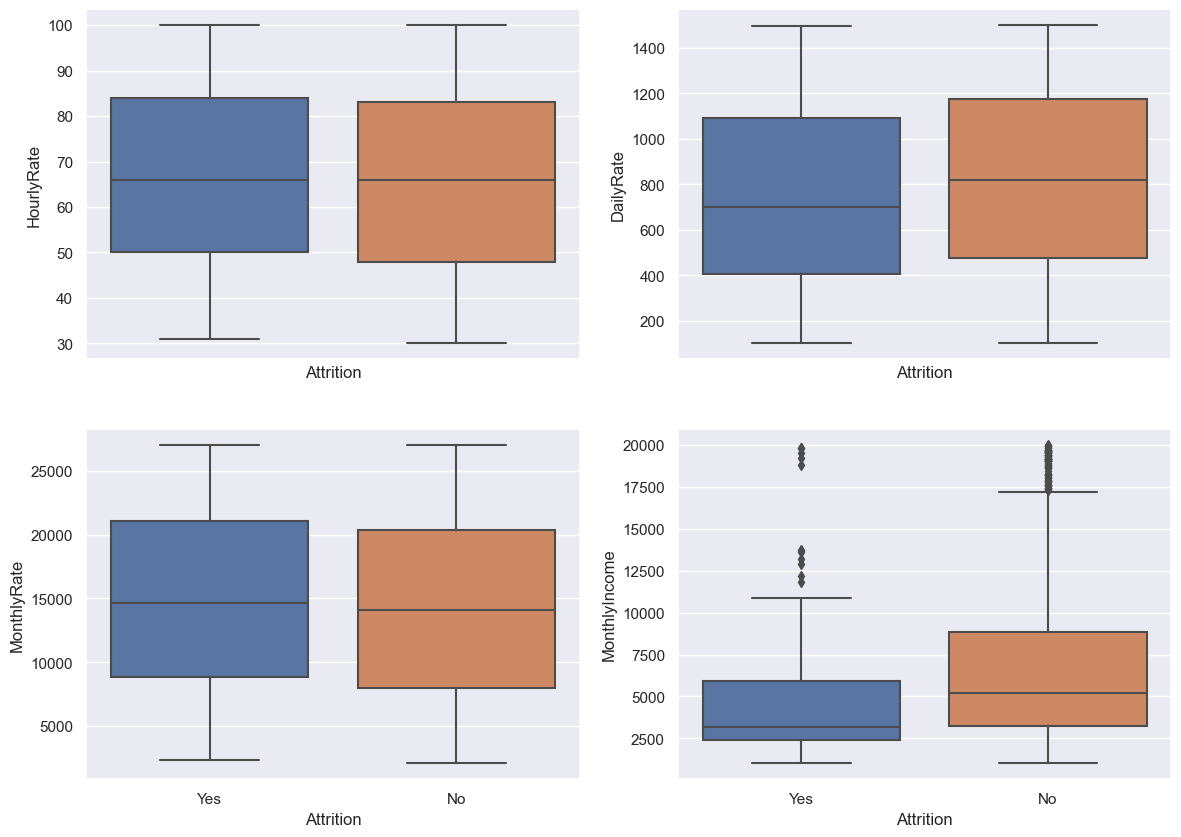

In [51]:
#boxplot
f, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
sns.boxplot(x='Attrition', y='HourlyRate', data=df, ax=axes[0][0])
sns.boxplot(x='Attrition', y='DailyRate', data=df, ax=axes[0][1])
sns.boxplot(x='Attrition', y='MonthlyRate',data=df, ax=axes[1][0])
sns.boxplot(x='Attrition', y='MonthlyIncome',data=df, ax=axes[1][1])
plt.show();

- <font color=#006699> Overall, the monthly income shows significant impact to employee attrition.

------------------------------------

# <font color="teal" > Feature Engineering

In [52]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [53]:
df1 = df.copy()

In [54]:
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [55]:
cat_col= list(df.select_dtypes(['object']).columns)
cat_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

- **Label Encoding Categorical Variables**

In [56]:
df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus','OverTime']] = df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus','OverTime']].apply(LabelEncoder().fit_transform)

In [57]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [58]:
# # Separate input features and target
x= df.drop(['Attrition'],axis = 1)
y= df.Attrition

In [59]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [60]:
x.shape

(1470, 30)

In [61]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [62]:
y.shape

(1470,)

# <font color="teal" > Feature Selection
- The feature Selection is one of the main steps of the preprocessing phase as the features which we choose directly effects the model performance. While some of the features seem to be less useful in terms of the context; others seem to equally useful. The better features we use the better our model will perform.

## - <font color=green> **FORWARD SEQUENTIAL FEATURE SELECTION METHOD**

In [63]:
classifier = SVC(gamma='auto')

In [64]:
%%time 
# performing the feature selection
selection=sfs(classifier ,k_features=25,forward =True,verbose=2,scoring='accuracy')
selection=selection.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.9s finished

[2023-05-24 12:34:41] Features: 1/25 -- score: 0.8387755102040817[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   12.8s finished

[2023-05-24 12:34:54] Features: 2/25 -- score: 0.846938775510204[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   17.4s finished

[2023-05-24 12:35:12] Features: 3/25 -- score: 0.8462585034013606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

CPU times: total: 5min 51s
Wall time: 6min 50s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.1s finished

[2023-05-24 12:41:19] Features: 25/25 -- score: 0.8414965986394558

In [65]:
selected_feature=list(selection.k_feature_names_)
print ("Selected feature after performing forward feature selection ")
print (selected_feature)

Selected feature after performing forward feature selection 
['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Selected feature after performing forward feature selection (25)
['BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

------------------------------------------------------

## - <font color=green>**FEATURE IMPORTANCE USING RF**

In [66]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [67]:
df1['Attrition_ind'] = 0 
df1.loc[df1['Attrition'] =='Yes', 'Attrition_ind'] = 1

In [68]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [69]:
df1.shape

(1470, 32)

In [70]:
df1['Attrition']=df1['Attrition_ind']
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [71]:
df1=df1.drop(['Attrition_ind'],axis=1)
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [72]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [73]:
df1.shape

(1470, 31)

In [74]:
column_to_move = df1.pop("Attrition")

In [75]:
df1.insert(29, "Attrition", column_to_move )

In [76]:
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,1,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,0,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,1,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,0,2


In [77]:
df1[['BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus','OverTime']] = df1[['BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus','OverTime']].apply(LabelEncoder().fit_transform)

In [78]:
df2=df1.copy()

In [79]:
x1=df1.drop('Attrition',axis=1)
y1=df1.Attrition

In [80]:
features_label = df1.columns[:-1]

In [81]:
features_label

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'Attrition'],
      dtype='object')

In [82]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(x1, y1)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(x1.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Age                            0.074277
 2) BusinessTravel                 0.060416
 3) DailyRate                      0.057004
 4) Department                     0.054661
 5) DistanceFromHome               0.053689
 6) Education                      0.050174
 7) EducationField                 0.050151
 8) EnvironmentSatisfaction        0.047628
 9) Gender                         0.040114
10) HourlyRate                     0.036418
11) JobInvolvement                 0.036241
12) JobLevel                       0.035490
13) JobRole                        0.030837
14) JobSatisfaction                0.030683
15) MaritalStatus                  0.030653
16) MonthlyIncome                  0.030582
17) MonthlyRate                    0.030076
18) NumCompaniesWorked             0.026039
19) OverTime                       0.025921
20) PercentSalaryHike              0.024119
21) PerformanceRating              0.023949
22) RelationshipSatisfaction       0.023370
23) StockOptionLevel            

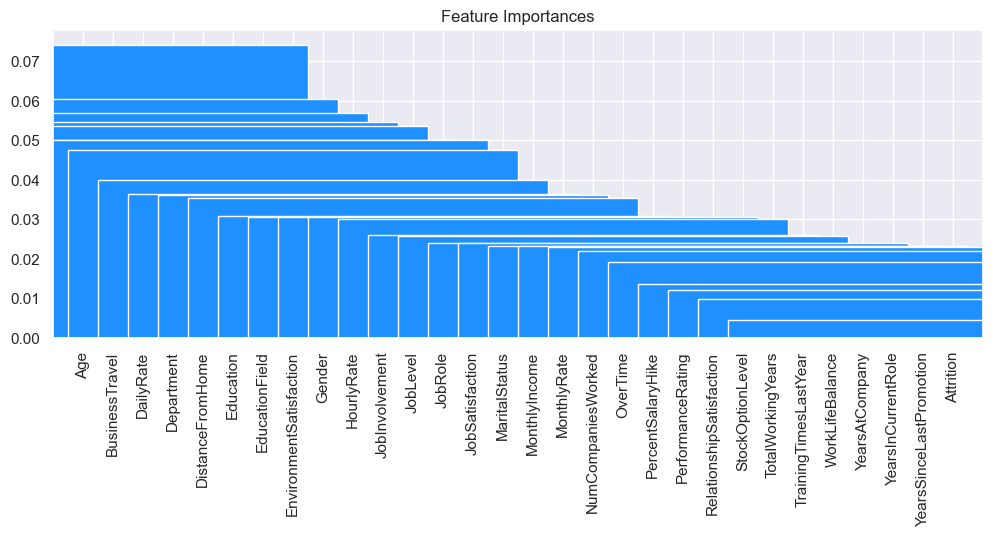

In [83]:
plt.figure(figsize=(12,4))
plt.title('Feature Importances')
plt.bar(range(x1.shape[1]),importances[indices], color="dodgerblue", align="center", width=15)
plt.xticks(range(x1.shape[1]),features_label, rotation=90)
plt.xlim([-1, x1.shape[1]])
plt.show()

---------------------------------------

## - <font color=green> **RECURSIVE FEATURE SELECTION TECHNIQUE**

In [84]:
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,1,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,0,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,1,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,0,2


In [85]:
df2.shape

(1470, 31)

In [86]:
df2.select_dtypes("object").columns

Index([], dtype='object')

In [87]:
X = df2.drop(["Attrition"], axis=1)
Y = df2["Attrition"]

In [88]:
df2["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.2, random_state=0)

In [90]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
rfecv = RFECV(estimator= model, step = 1, cv = 5, scoring="accuracy")
rfecv = rfecv.fit(XTrain, YTrain)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", XTrain.columns[rfecv.support_])

The optimal number of features: 19
Best features: Index(['Age', 'DailyRate', 'DistanceFromHome', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


The optimal number of features: 25
Best features: Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [91]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


-  <font color=RED>**Dropping Unwanted Columns On the basis Feature Selection**

In [93]:
df=df.drop(columns=['BusinessTravel','DailyRate', 'HourlyRate','TrainingTimesLastYear','DistanceFromHome'])

In [94]:
df.shape

(1470, 26)

In [95]:
df.head()

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,0,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,1,6,4,0,5
1,49,0,1,1,1,3,1,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,10,7,1,7
2,37,1,1,2,4,4,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,0,0,0,0
3,33,0,1,4,1,4,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,8,7,3,0
4,27,0,1,1,3,1,1,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,2,2,2,2


In [96]:
df.nunique()

Age                           43
Attrition                      2
Department                     3
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [97]:
df.columns

Index(['Age', 'Attrition', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# <font color="teal" > **Checking Normality of the data**

In [100]:
num_col=['Age','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole', 
        'YearsSinceLastPromotion','YearsWithCurrManager']

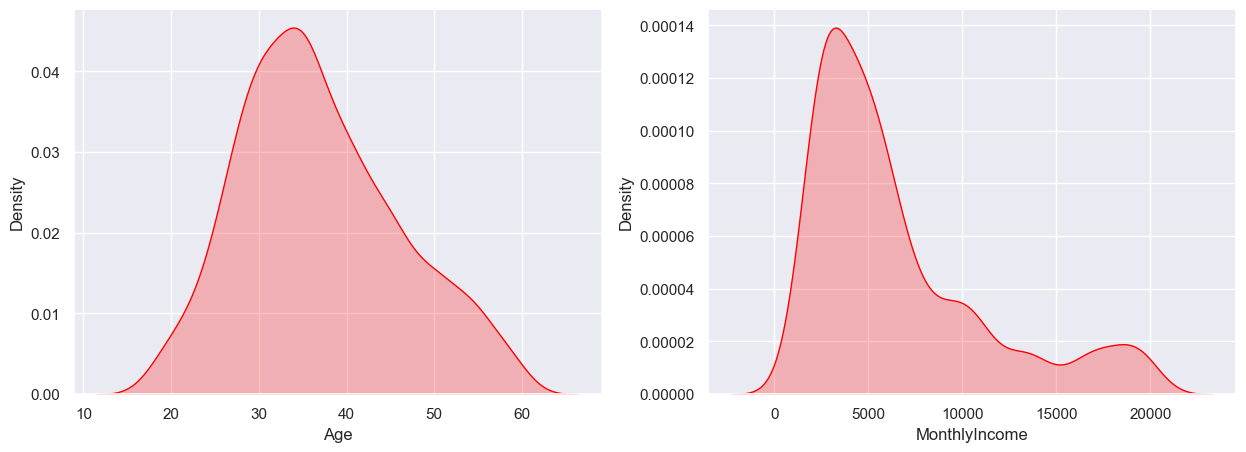

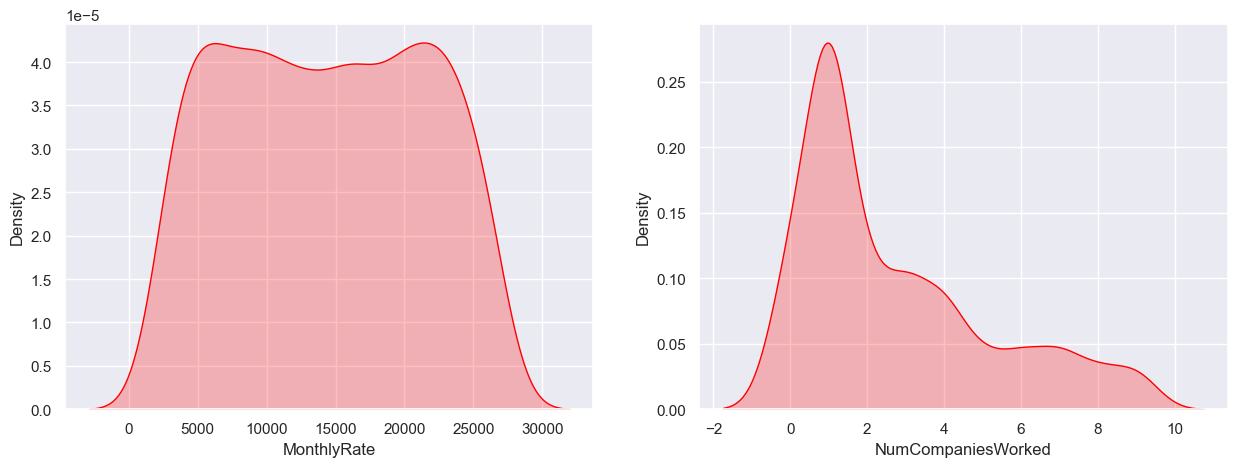

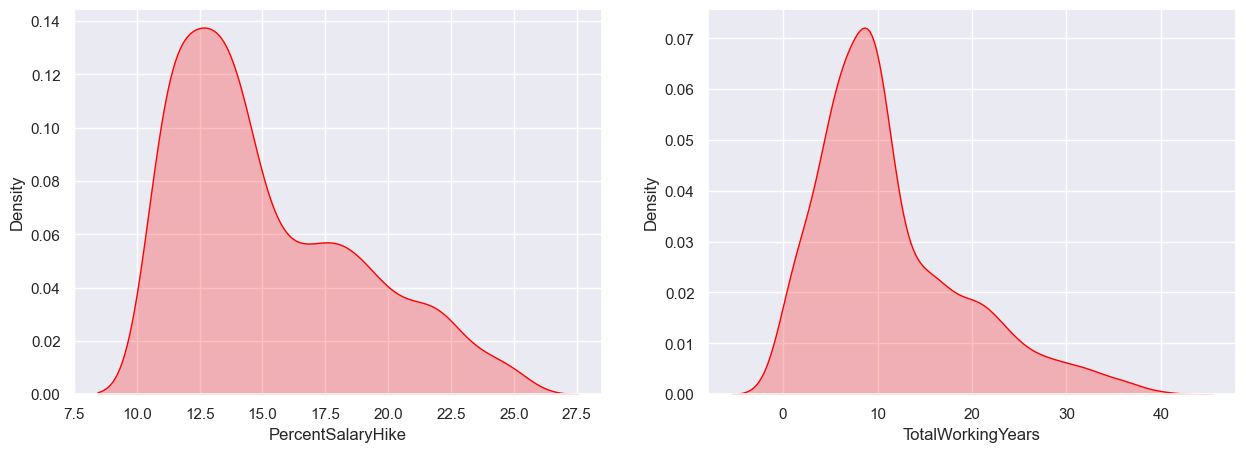

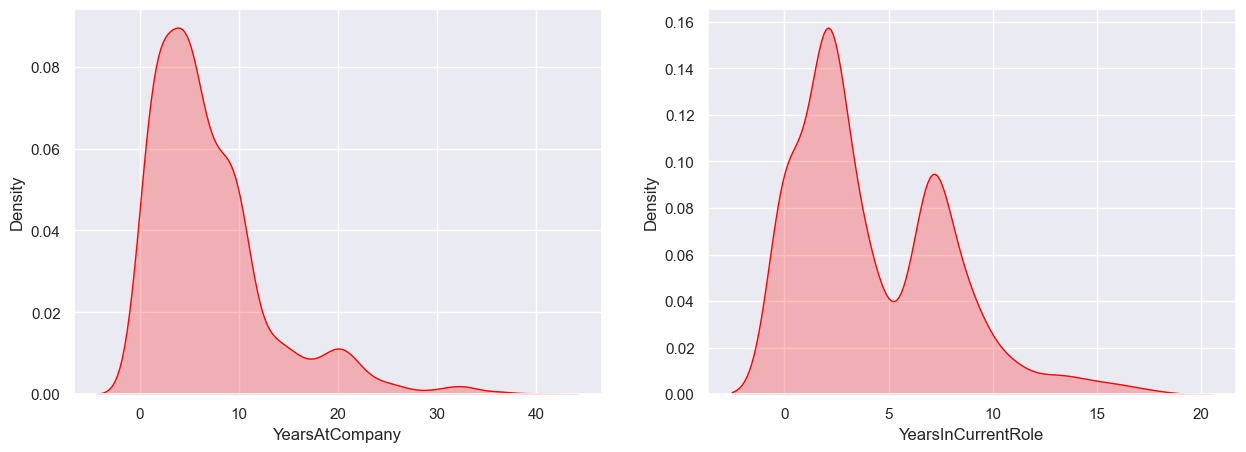

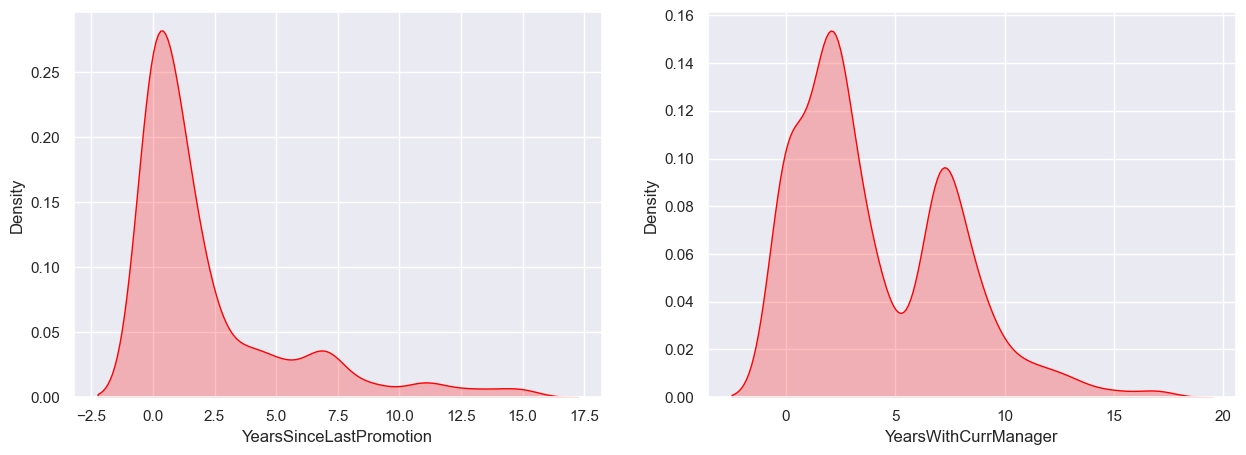

In [101]:
color_code = sns.color_palette("rocket", as_cmap=True)
c_color = 'rocket'
# checking distributions
i = 0
while i < 10:
    plt.figure(figsize = [15,5])
    plt.subplot(1,2,1)
    sns.kdeplot(x = num_col[i], data = df,color = 'red', fill = True)
    i+=1
    
    plt.subplot(1,2,2)
    sns.kdeplot(x = num_col[i], data = df, color = 'red',fill = True)
    i+=1
    plt.show()

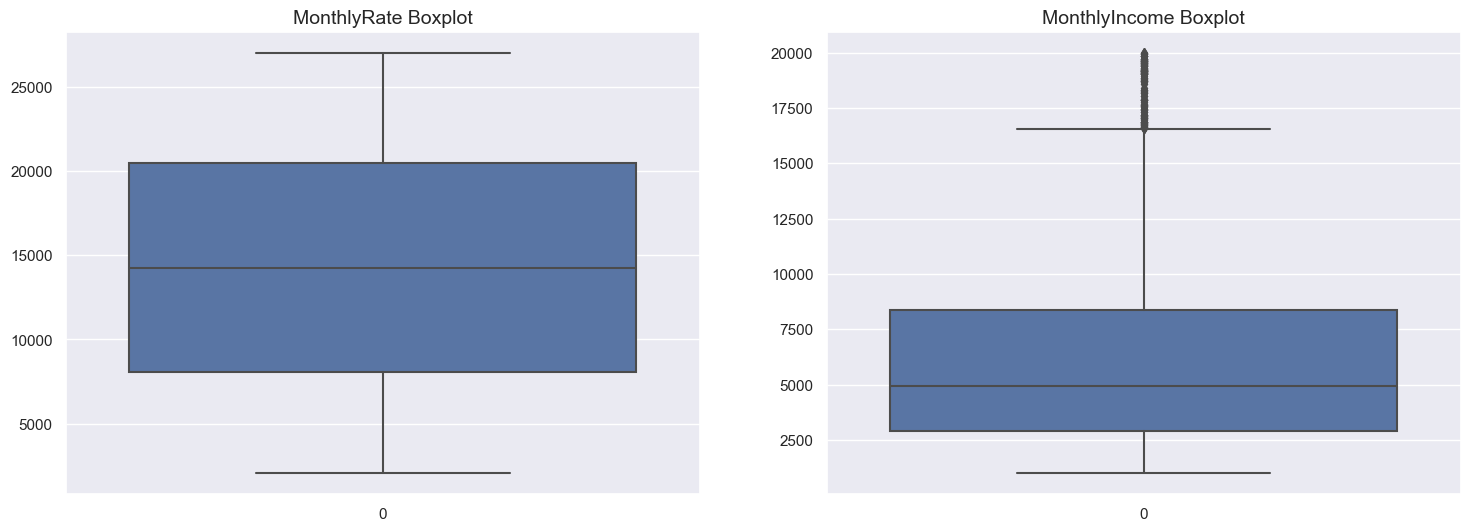

In [102]:
#checking outliers
#MonthlyIncome and #MonthlyRate

plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.boxplot(df['MonthlyRate'])
plt.title('MonthlyRate Boxplot', fontsize=14) 

plt.subplot(122)
sns.boxplot(df['MonthlyIncome'])
plt.title('MonthlyIncome Boxplot', fontsize=14)
plt.show()

In [104]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(df)

ShapiroResult(statistic=0.2527042627334595, pvalue=0.0)

- <font color=#006699> Since the **p-value is less than .05**, we reject the null hypothesis. We do have sufficient evidence to say that the sample data does not come from a normal distribution.

### -<font color=green> Data is Non- Normal

In [105]:
df.head()

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,0,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,1,6,4,0,5
1,49,0,1,1,1,3,1,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,10,7,1,7
2,37,1,1,2,4,4,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,0,0,0,0
3,33,0,1,4,1,4,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,8,7,3,0
4,27,0,1,1,3,1,1,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,2,2,2,2


- <font color=#006699> **Defining independent and dependent variable**

In [106]:
# # Separate input features and target
X= df.drop(['Attrition'],axis = 1)
y= df.Attrition

In [107]:
X.head()

,Age,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,0,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,1,6,4,0,5
1,49,1,1,1,3,1,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,10,7,1,7
2,37,1,2,4,4,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,0,0,0,0
3,33,1,4,1,4,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,8,7,3,0
4,27,1,1,3,1,1,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,2,2,2,2


In [108]:
y.shape

(1470,)

- <font color=#006699> **Scaling the data**

In [109]:
X.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
# X= scaler.fit_transform(X.to_numpy())
X= scaler.fit_transform(X)
X= pd.DataFrame(X, columns=['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'])
 
print("Scaled Dataset Using MinMaxScaler -")
X.head()

Scaled Dataset Using MinMaxScaler -


,Age,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.25,0.2,0.333333,0.0,0.666667,0.25,0.875,1.000000,1.0,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.00,0.2,0.666667,1.0,0.333333,0.25,0.750,0.333333,0.5,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.5,0.25,0.8,1.000000,1.0,0.333333,0.00,0.250,0.666667,1.0,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.75,0.2,1.000000,0.0,0.666667,0.00,0.750,0.666667,0.5,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.5,0.00,0.6,0.000000,1.0,0.666667,0.00,0.250,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.666667,0.05,0.111111,0.133333,0.117647


- <font color=#006699>  **Splitting the train dataset**

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
x_train.shape

(1176, 25)

In [115]:
x_test.shape

(294, 25)

In [116]:
y_train.shape

(1176,)

In [117]:
y_test.shape

(294,)

# <font color="teal" > -ML Model Building

In [118]:
Model_lr = LogisticRegression()
Model_lr.fit(x_train, y_train)
y_predict1 = Model_lr.predict(x_test)

In [119]:
from sklearn import metrics
mat = metrics.confusion_matrix(y_test, y_predict1)
print("Confusion Matix : \n",mat)
f1_log=(f1_score(y_test, y_predict1))
print("\n")
print("F1_Score :",f1_log*100)
acc_log=accuracy_score(y_test, y_predict1)*100
print('Accuracy :',acc_log)

#calculating precision and reall
precision = precision_score(y_test, y_predict1)
recall = recall_score(y_test, y_predict1)
 
print('Precision: ',precision)
print('Recall: ',recall)

Confusion Matix : 
 [[251   4]
 [ 28  11]]


F1_Score : 40.74074074074074
Accuracy : 89.1156462585034
Precision:  0.7333333333333333
Recall:  0.28205128205128205


In [120]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.73      0.28      0.41        39

    accuracy                           0.89       294
   macro avg       0.82      0.63      0.67       294
weighted avg       0.88      0.89      0.87       294



In [121]:
 #Random Forest

In [122]:
Model_rf = RandomForestClassifier(n_estimators=100)
Model_rf.fit(x_train, y_train)
y_predict3 = Model_rf.predict(x_test)

In [123]:
mat = metrics.confusion_matrix(y_test, y_predict3)
print("Confusion Matix : \n",mat)
f1_rf=(f1_score(y_test, y_predict3))
print("\n")
print("F1_Score :",f1_rf*100)
acc_random_forest = accuracy_score(y_test, y_predict3) * 100
print('Accuracy :',acc_random_forest)

Confusion Matix : 
 [[252   3]
 [ 35   4]]


F1_Score : 17.391304347826086
Accuracy : 87.07482993197279


 <font color=#006699>  **As F1 score and Recall is low on original data, we will try with balancing the data.**

-------------------------------------------------

- <font color=#006699>  **Random Over Sampling method** - Balancing Data

In [124]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=41)

In [ ]:
#Defining independent and dependent variable

In [125]:
df.head()

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,0,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,1,6,4,0,5
1,49,0,1,1,1,3,1,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,10,7,1,7
2,37,1,1,2,4,4,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,0,0,0,0
3,33,0,1,4,1,4,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,8,7,3,0
4,27,0,1,1,3,1,1,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,2,2,2,2


In [126]:
df.shape

(1470, 26)

In [127]:
# # Separate input features and target
X= df.drop(['Attrition'],axis = 1)
y= df.Attrition

In [128]:
X, y = ros.fit_resample(X, y)

In [129]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [130]:
#Splitting the dataset
# setting up testing and training sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 42)

In [131]:
X_train.shape 

(1726, 25)

In [132]:
X_val.shape

(740, 25)

In [133]:
y_train.shape

(1726,)

In [134]:
y_val.shape

(740,)

- Scaling

In [135]:
X.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X= scaler.fit_transform(X.to_numpy())
X= pd.DataFrame(X, columns=['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'])
 
print("Scaled Dataset Using MinMaxScaler - ")
X.head()

Scaled Dataset Using MinMaxScaler - 


,Age,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.25,0.2,0.333333,0.0,0.666667,0.25,0.875,1.000000,1.0,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.00,0.2,0.666667,1.0,0.333333,0.25,0.750,0.333333,0.5,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.5,0.25,0.8,1.000000,1.0,0.333333,0.00,0.250,0.666667,1.0,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.75,0.2,1.000000,0.0,0.666667,0.00,0.750,0.666667,0.5,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.5,0.00,0.6,0.000000,1.0,0.666667,0.00,0.250,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.666667,0.05,0.111111,0.133333,0.117647


In [137]:
X.shape

(2466, 25)

- <font color=#006699>  **Model Building on Balancing Data**

<font color=#006699> **Logistic Regression**

In [138]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [139]:
# model evaluation for training set
y_train_predict = logreg.predict(X_train)

print("The model performance for training set")
print("--------------------------------------")
acc_log_train=accuracy_score(y_train, y_train_predict)
print('Training Accuracy :',acc_log_train)

The model performance for training set
--------------------------------------
Training Accuracy : 0.6807647740440325


In [140]:
Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)
y_predict1 = Model_lr.predict(X_val)

In [141]:
from sklearn import metrics
mat = metrics.confusion_matrix(y_val, y_predict1)
print("Confusion Matix : \n",mat)
f1_log=(f1_score(y_val, y_predict1))
print("\n")
print("F1_Score :",f1_log*100)
acc_log=accuracy_score(y_val, y_predict1)*100
print('Accuracy :',acc_log)

#calculating precision and reall
precision = precision_score(y_val, y_predict1)*100
recall = recall_score(y_val, y_predict1)*100
 
print('Precision: ',precision)
print('Recall: ',recall)

Confusion Matix : 
 [[254 115]
 [148 223]]


F1_Score : 62.90550070521862
Accuracy : 64.45945945945945
Precision:  65.97633136094674
Recall:  60.1078167115903


<font color=#006699> **KNeighborsClassifier**

In [142]:
Model_knn = KNeighborsClassifier(n_neighbors = 11)
Model_knn.fit(X_train, y_train)
y_predict2 = Model_knn.predict(X_val)

In [143]:
mat = metrics.confusion_matrix(y_val, y_predict2)
print("Confusion Matix : \n",mat)
f1_knn=(f1_score(y_val, y_predict2))
print("\n")
print("F1_Score :",f1_knn*100)
acc_knn=accuracy_score(y_val, y_predict2)*100
print('Accuracy :',acc_knn)

Confusion Matix : 
 [[210 159]
 [114 257]]


F1_Score : 65.31130876747142
Accuracy : 63.108108108108105


<font color=#006699> **RandomForestClassifier**

In [144]:
Model_rf = RandomForestClassifier(n_estimators=100)
Model_rf.fit(X_train, y_train)
y_predict3 = Model_rf.predict(X_val)

In [146]:
mat = metrics.confusion_matrix(y_val, y_predict3)
print("Confusion Matix : \n",mat)
f1_rf=(f1_score(y_val, y_predict3))
print("\n")
print("F1_Score :",f1_rf*100)
acc_random_forest = accuracy_score(y_val, y_predict3) * 100
print('Accuracy :',acc_random_forest)

Confusion Matix : 
 [[346  23]
 [  7 364]]


F1_Score : 96.04221635883904
Accuracy : 95.94594594594594


In [147]:
Models = [LogisticRegression(max_iter=100),RandomForestClassifier(),XGBClassifier(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),LGBMClassifier()]
model_names : str = ['Logistic Regression','Random Forest','XGBoost','Decision Tree','ADA Boost','Gradient Boosting','Light GBM']

<font color=#006699> - Testing the models for Accuracy , F1 Score and Time Complexitiy

In [149]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [150]:
# Creating List for Accuracy, F1 Score and Time
final_accuracy = []
train_accuracy=[]
final_F1 = []
final_recall=[]
final_precision=[]
final_auc_score=[]
final_time = []
import time
# Looping Each Model for training
for model in Models:
    classifier = model
    start = time.time()
    
    classifier.fit(X_train, y_train)
    y_train_predict = classifier.predict(X_train)
    y_pred=classifier.predict(X_val)
    

    
    stop = time.time()
    acc = accuracy_score(y_val,y_pred)*100
    f1 = f1_score(y_val,y_pred)*100
    acc_train=accuracy_score(y_train, y_train_predict)*100
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc_score = roc_auc_score(y_val,y_pred) 
    # t = stop - start
    print(f"Model:{model} have Accuracy Score:{acc:.2f} ,Training Accuracy:{acc_train:.2f} & F1 Score:{f1:.2f},Recall:{recall:.2f},Precision:{precision:.2f},AUC Score:{auc_score:.2f} with Time: {stop - start:.2f}")
    print('\n')

    final_accuracy.append(round(classifier.score(X_val,y_val), 2))
    train_accuracy.append(round(accuracy_score(y_train, y_train_predict), 2))
    final_F1.append(round(f1_score(y_val,y_pred), 2))
    final_recall.append(round(recall_score(y_val,y_pred), 2)) 
    final_precision.append(round(precision_score(y_val,y_pred), 2))
    final_auc_score.append(round(roc_auc_score(y_val,y_pred), 2))
    final_time.append(round((stop-start),2))
    

Model:LogisticRegression() have Accuracy Score:64.46 ,Training Accuracy:68.08 & F1 Score:62.91,Recall:0.60,Precision:0.66,AUC Score:0.64 with Time: 0.17


Model:RandomForestClassifier() have Accuracy Score:96.22 ,Training Accuracy:100.00 & F1 Score:96.30,Recall:0.98,Precision:0.95,AUC Score:0.96 with Time: 0.89


Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_p

## <font color="teal" > Model Evaluation

In [151]:
models = pd.DataFrame({
    'Model': model_names,
    'F1 Score': final_F1,
    'Test Accuracy': final_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision':final_precision,
    'Recall':final_recall,
    'AUC Score':final_auc_score,
    'Time' : final_time}
)
models.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score,Test Accuracy,Train Accuracy,Precision,Recall,AUC Score,Time
1,Random Forest,0.96,0.96,1.00,0.95,0.98,0.96,0.89
2,XGBoost,0.95,0.95,1.00,0.93,0.98,0.95,1.35
6,Light GBM,0.95,0.95,1.00,0.92,0.98,0.95,0.41
3,Decision Tree,0.92,0.91,1.00,0.86,0.99,0.91,0.07
5,Gradient Boosting,0.84,0.84,0.92,0.84,0.84,0.84,1.09
4,ADA Boost,0.79,0.79,0.84,0.78,0.79,0.79,0.49
0,Logistic Regression,0.63,0.64,0.68,0.66,0.60,0.64,0.17


-<font color=#006699>  **RandomForest and LightGBM emerges to be the Best models among others with high F1 Score and Accuracy**

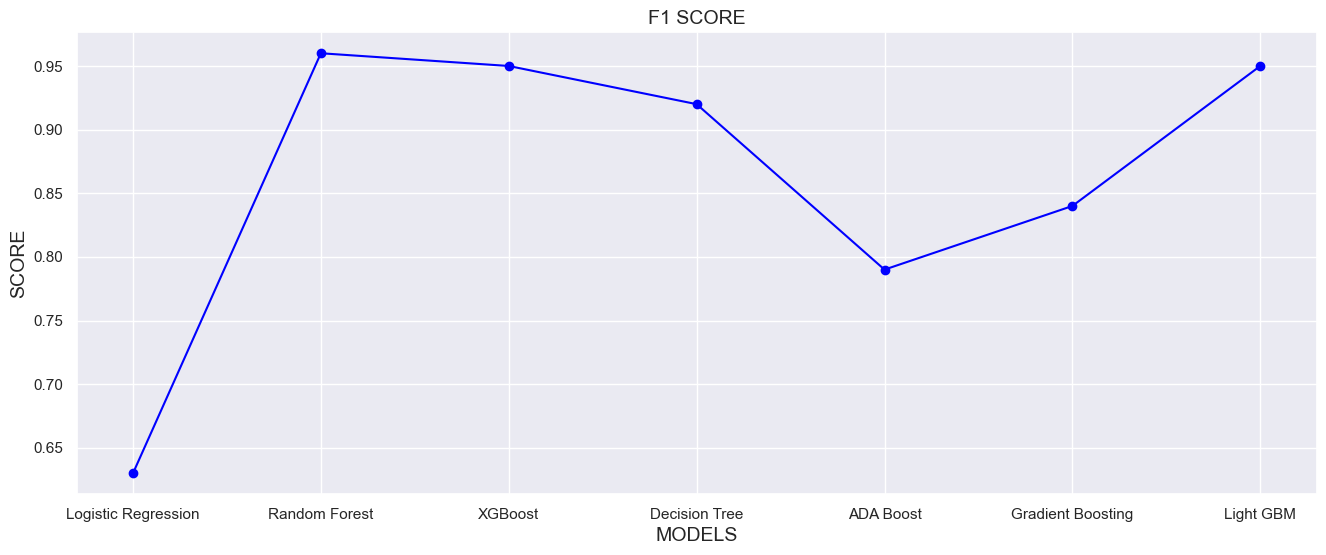

In [152]:
plt.plot(models['Model'], models['F1 Score'], color='blue', marker='o')
plt.title('F1 SCORE', fontsize=14)
plt.xlabel('MODELS', fontsize=14)
plt.ylabel('SCORE', fontsize=14)
plt.grid(True)
plt.show()

- <font color=#006699> **Random Forest has best F1 Score**

# <font color="teal" >***Approach 2 : Regression (Percent Salary Hike)***

<font color=#006699>  **We can treat PercentSalaryHike in two ways :**
- As a continuous variable and perform regression model.
- As a multi-class variable and perform a multi-classification model

In [153]:
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [154]:
df3.shape

(1470, 31)

In [155]:
df3.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [156]:
df3['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [157]:
df3['PercentSalaryHike'].nunique()

15

In [158]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [159]:
cat= list(df3.select_dtypes(['object']).columns)
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

 - Label Encoding Categorical Columns

In [160]:
df3[['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']]=df3[['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']].apply(LabelEncoder().fit_transform)

- <font color=#006699>  Dataset splitting

- <font color=#006699> **Defining independent and dependent variable**

In [161]:
# # Separate input features and target
x1= df3.drop(['PercentSalaryHike'],axis = 1)
y1= df3.PercentSalaryHike

In [162]:
x1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

-----------------------------------

- <font color=#006699>  Features Scaling

In [163]:
x1.shape

(1470, 30)

In [164]:
y1.shape

(1470,)

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
# x1= scaler.fit_transform(x1.to_numpy())
x1= scaler.fit_transform(x1)
x1= pd.DataFrame(x1, columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'])
 
print("Scaled Dataset Using MinMaxScaler -")
x1.head()

Scaled Dataset Using MinMaxScaler -


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,0.666667,0.25,0.875,1.000000,1.0,0.262454,0.698053,0.888889,1.0,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,0.333333,0.25,0.750,0.333333,0.5,0.217009,0.916001,0.111111,0.0,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,0.333333,0.00,0.250,0.666667,1.0,0.056925,0.012126,0.666667,1.0,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,0.371429,0.666667,0.00,0.750,0.666667,0.5,0.100053,0.845814,0.111111,1.0,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,0.142857,0.666667,0.00,0.250,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [170]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(x1, y1, test_size=0.3)

In [171]:
(x_train1.shape, y_train1.shape), (x_val1.shape, y_val1.shape)

(((1029, 30), (1029,)), ((441, 30), (441,)))

In [172]:
#Machine Learning

## <font color=#006699>  **RandomForest Regressor**

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [174]:
ml_model = RandomForestRegressor(n_estimators=10, random_state=1)
ml_model = ml_model.fit(x_train1, y_train1)

In [175]:
y_val_pred = ml_model.predict(x_val1)

In [176]:
squared = False
rmse = mean_squared_error(y_val1, y_val_pred, squared=squared)
mae = mean_absolute_error(y_val1, y_val_pred, )

print(f"{mean_absolute_error.__name__} :  {mae}")
# print(f"{'' if squared else 'root_'}{mean_squared_error.__name__} :  {mae}")

mean_absolute_error :  2.124716553287982


## <font color=#006699> **Linear Regression**

In [177]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [178]:
lm.fit(x_train1,y_train1)
predictions = lm.predict(x_val1)

In [179]:
squared = False
rmse = mean_squared_error(y_val1, predictions, squared=squared)
mae = mean_absolute_error(y_val1, predictions, )

print(f"{mean_absolute_error.__name__} :  {mae}")
# print(f"{'' if squared else 'root_'}{mean_squared_error.__name__} :  {mae}")

mean_absolute_error :  1.9110475944474


## <font color=#006699>  **Decision Regression**

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train1, y_train1)
y_val_pred1 = regressor.predict(x_val1)

In [181]:
#R2 SCORE
r2_score(y_val1,y_val_pred1)

0.12245440550432796

In [182]:
#RMSE 
print('MSE',"%0.3f" % mean_squared_error(y_val_pred1,y_val1))
rmse = (np.sqrt(mean_squared_error(y_val1, y_val_pred1)))
print('RMSE is {}'.format(rmse))

MSE 11.490
RMSE is 3.3896601479156208


In [183]:
reg_1 = LinearRegression()
reg_1.fit(x_train1, y_train1)

LinearRegression()

In [184]:
# model evaluation for training set

y_train_predict = reg_1.predict(x_train1)
rmse = (np.sqrt(mean_squared_error(y_train1, y_train_predict)))
r2 = round(reg_1.score(x_train1, y_train1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 2.2865823604929596
R2 score is 0.61




In [185]:
# model evaluation for test set
y_pred = reg_1.predict(x_val1)
rmse = (np.sqrt(mean_squared_error(y_val1, y_pred)))
r2 = round(reg_1.score(x_val1, y_val1),2)

print("The model performance for testing set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for testing set
--------------------------------------
Root Mean Squared Error: 2.365434261047125
R^2: 0.57




In [186]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
# from xgboost import xgboost as xgb
from xgboost import XGBRegressor


In [187]:
Models_regression = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(),SVR(),Ridge(),Lasso(),ElasticNet()]
model_names_reg : str = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','SVR','Ridge','Lasso','ElasticNet']

In [188]:
# Creating List for Accuracy, F1 Score and Time
final_rmse = []
final_r2 = []
final_time1 = []
import time
# Looping Each Model for training
for model in Models_regression:
    regressor= model
    start = time.time()
    
    regressor.fit(x_train1, y_train1)
    y_pred=regressor.predict(x_val1)
    
    stop = time.time()
    rmse = (np.sqrt(mean_squared_error(y_val1, y_pred)))
    r2 = r2_score(y_val1,y_pred)
    # t = stop - start
    print(f"Model : {model} have RMSE Score : {rmse:.2f} &  R-Squared : {r2:.2f} with Time : {stop - start:.2f}")
    print('\n')

    final_rmse.append(round(regressor.score(x_val1,y_val1), 2))
    final_r2.append(round(r2_score(y_val1,y_pred), 2))
    final_time1.append(round((stop-start),2))

Model : LinearRegression() have RMSE Score : 2.37 &  R-Squared : 0.57 with Time : 0.02


Model : DecisionTreeRegressor() have RMSE Score : 3.48 &  R-Squared : 0.07 with Time : 0.04


Model : RandomForestRegressor() have RMSE Score : 2.44 &  R-Squared : 0.55 with Time : 2.89


Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None

## Model Evaluation

In [189]:
models_reg = pd.DataFrame({
    'Model': model_names_reg,
    'RMSE': final_rmse,
    'R2': final_r2,
    'Time' : final_time1}
)
models_reg.sort_values(by='RMSE', ascending=True)

,Model,RMSE,R2,Time
6,Lasso,0.04,0.04,0.02
1,DecisionTreeRegressor,0.07,0.07,0.04
7,ElasticNet,0.12,0.12,0.02
3,XGBRegressor,0.45,0.45,0.37
4,SVR,0.51,0.51,0.34
2,RandomForestRegressor,0.55,0.55,2.89
0,LinearRegression,0.57,0.57,0.02
5,Ridge,0.57,0.57,0.04


- <font color=#006699> **Lasso Regression gives good results for RMSE & R-SQUARED among all other algorithms**

--------------------------------------------------

# <font color="teal" >Survival Analysis

-  <font color=#006699> **HR attrition survival analysis is a statistical method used to analyze the factors that influence employee attrition or turnover within an organization. The survival analysis approach focuses on the time it takes for an employee to leave the organization, also known as the survival time or time-to-event.**
- **The results of the analysis can be used to identify the most significant factors contributing to attrition within the organization.** 
- **HR departments can then use this information to design and implement targeted interventions to reduce employee turnover and improve retention rates. Some common interventions include improving employee engagement, providing training and development opportunities, offering flexible work arrangements, and enhancing the overall work environment.**

In [190]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.utils import median_survival_times
from lifelines.utils import survival_table_from_events
from lifelines.statistics import logrank_test

In [191]:
dff=pd.read_csv(r"C:\Users\Anik8\Desktop\HR_Data.csv")

In [192]:
dff.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [193]:
dff2=dff.copy()

In [194]:
dff.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [195]:
dff[['Attrition','Gender']]=dff[['Attrition','Gender']].apply(LabelEncoder().fit_transform)

- <font color=#006699> **Censoring occurs when we have some information about individual survival time, but we do not know the survival time exactly.**

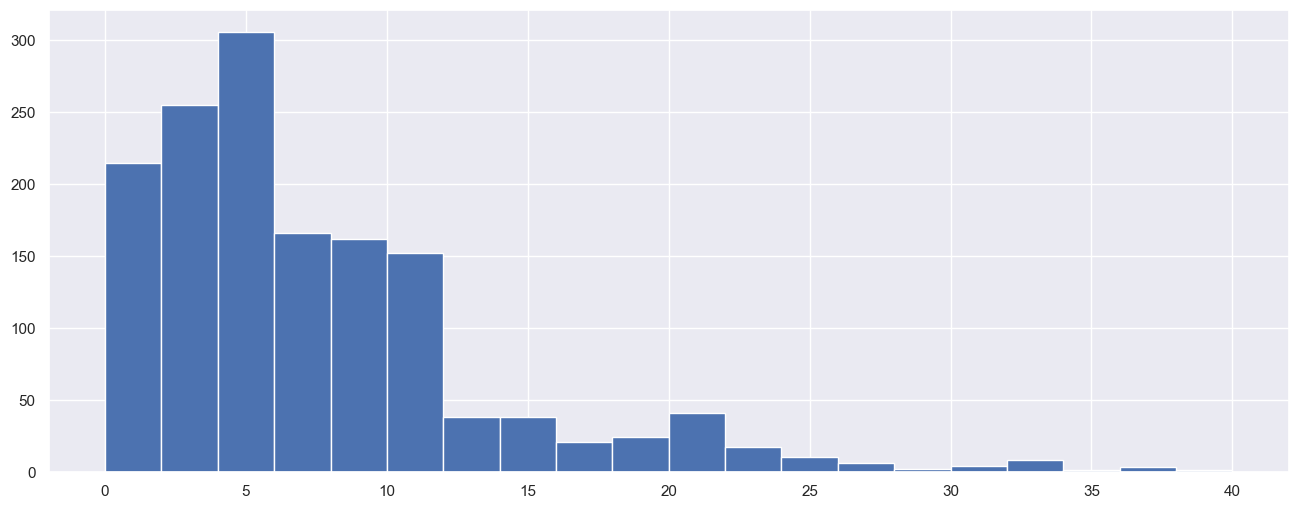

In [196]:
T=dff['YearsAtCompany']
E=dff['Attrition']
plt.hist(T,bins=20)
plt.show()

- <font color=#006699> **Most employees working at this company are from 1 to 5 years.**

In [197]:
#Fitting a non parametric model(Kaplan meier curve)

# <font color="teal" > Kaplan-Meier Estimator

<AxesSubplot: xlabel='timeline'>

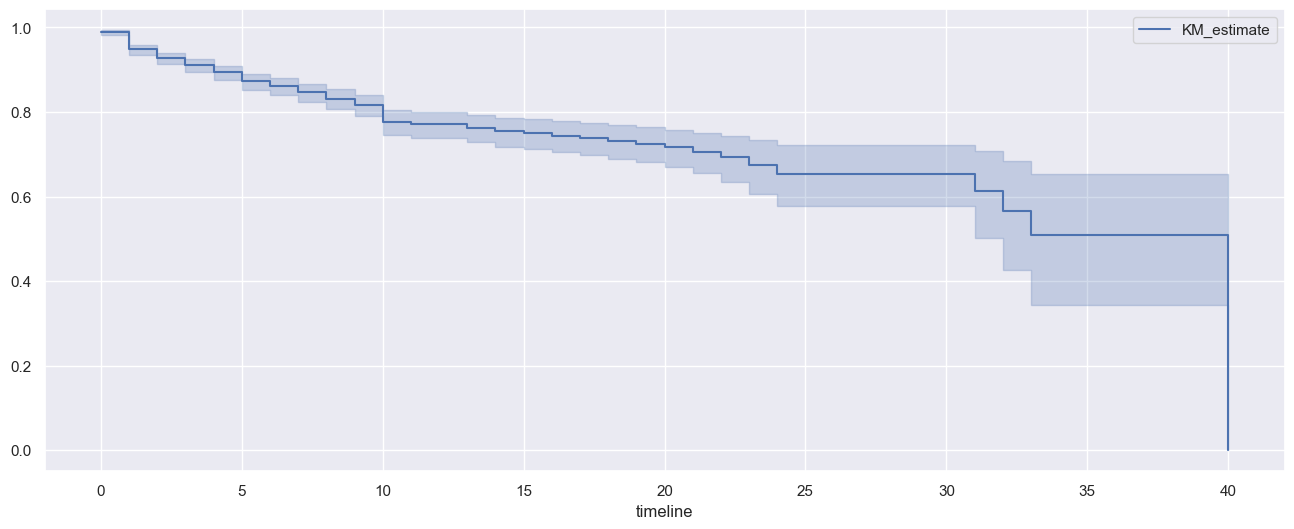

In [198]:
kmf = KaplanMeierFitter()
kmf.fit(durations=T,event_observed=E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival Function')

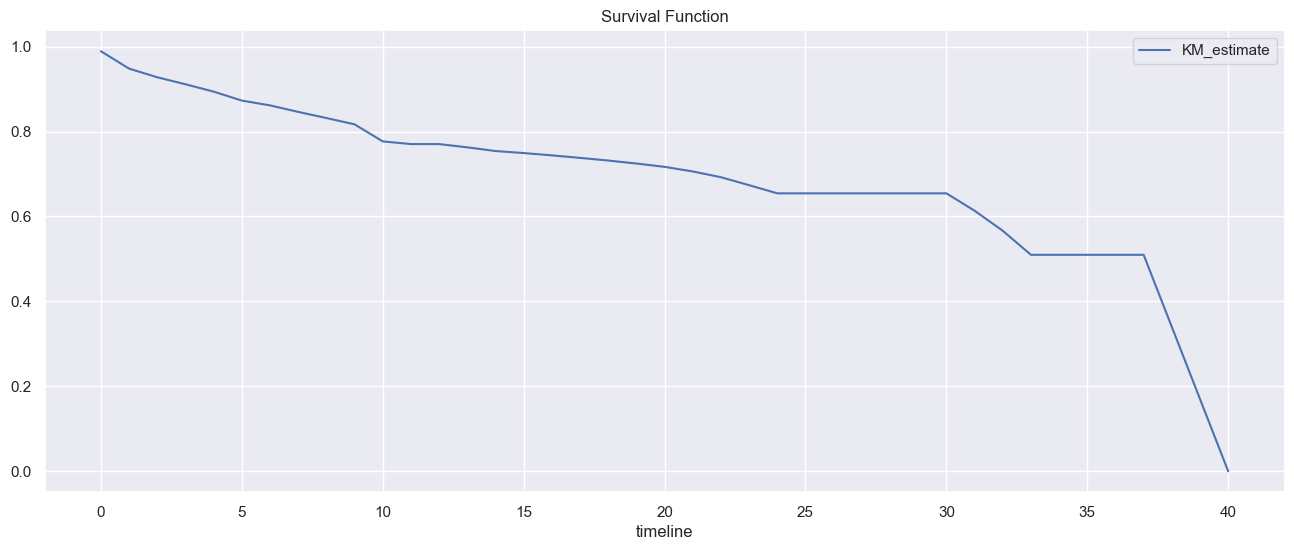

In [199]:
kmf.survival_function_.plot()
plt.title('Survival Function')

- <font color=#006699>  Survival function S(t): The probability that a subject survives longer than time t.

In [200]:
# Print survival probabilities at each year for overall
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.989116
1.0,0.948192
2.0,0.927792
3.0,0.911342
4.0,0.894026
5.0,0.872931
6.0,0.861611
7.0,0.846275
8.0,0.831850


- <font color=#006699> We can see that probability of an individual working in a company more than 5 years at the company is 87% however probability of working longer than 15 years is dropped to 75%

<font color=#006699>  **Cumulative_density:** - Failure Rate

It gives us a probability of a person leaving at a certain timeline.

In [201]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.010884
1.0,0.051808
2.0,0.072208
3.0,0.088658
4.0,0.105974
5.0,0.127069
6.0,0.138389
7.0,0.153725
8.0,0.168150


- <font color=#006699>  **As the years at company moves forward of the employee the failure rate increases.**

<AxesSubplot: xlabel='timeline'>

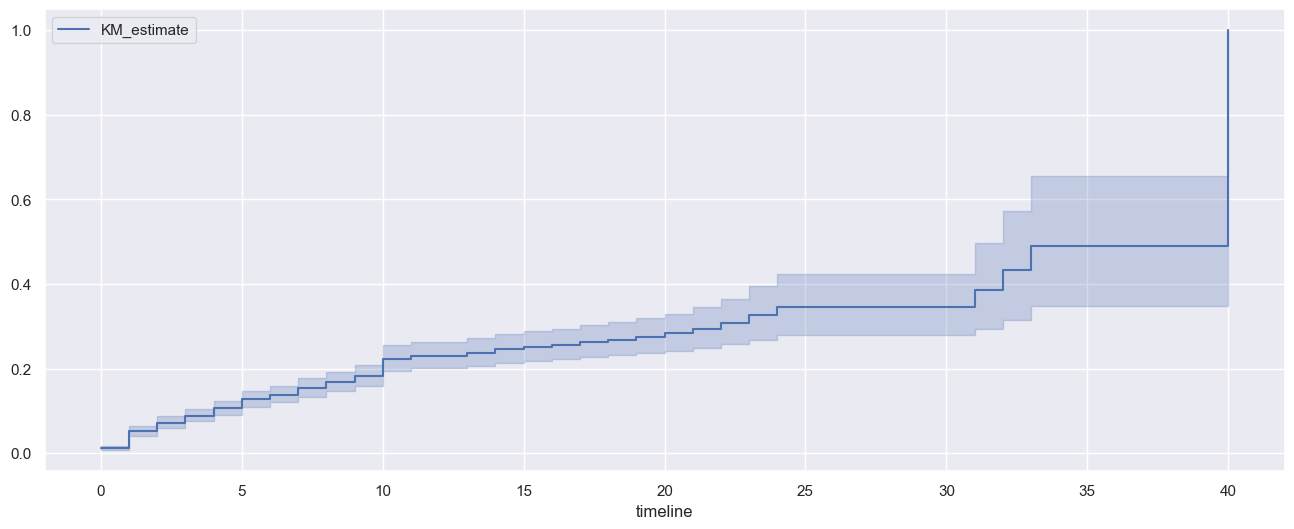

In [202]:
kmf.plot_cumulative_density()

In [203]:
kmf.median_survival_time_

40.0

In [204]:
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_confidence_interval_)

     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    32.0                    40.0


In [205]:
df.head()

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,0,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,1,6,4,0,5
1,49,0,1,1,1,3,1,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,10,7,1,7
2,37,1,1,2,4,4,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,0,0,0,0
3,33,0,1,4,1,4,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,8,7,3,0
4,27,0,1,1,3,1,1,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,2,2,2,2


Text(0.5, 1.0, 'Survival Of different gender group')

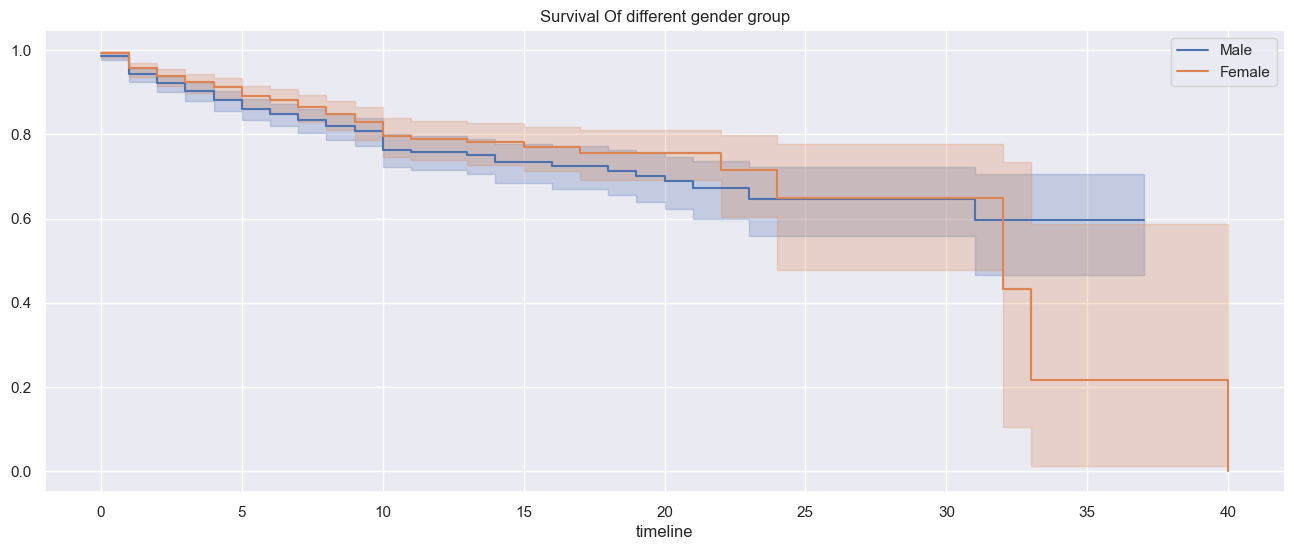

In [206]:
ax=plt.subplot(111)
m=(dff['Gender']==0) #female
_m=(dff['Gender']==1) #male
kmf_male=kmf.fit(durations=T[_m], event_observed=E[_m] , label='Male')
Male= kmf_male.survival_function_
kmf_male.plot_survival_function(ax=ax,at_risk_counts=False)

kmf_female=kmf.fit(durations=T[m], event_observed=E[m] , label='Female')
Female= kmf_female.survival_function_
kmf_female.plot_survival_function(ax=ax,at_risk_counts=False)

plt.title("Survival Of different gender group")

- <font color=#006699>  **Complete list of survival_probability of Male And Female:**

In [207]:
Male

,Male
timeline,
0.0,0.986395
1.0,0.942452
2.0,0.920975
3.0,0.902917
4.0,0.881528
5.0,0.861027
6.0,0.848334
7.0,0.834195
8.0,0.820565


In [208]:
Female

,Female
timeline,
0.0,0.993197
1.0,0.956797
2.0,0.938000
3.0,0.923879
4.0,0.912585
5.0,0.890624
6.0,0.881315
7.0,0.864235
8.0,0.848663


-<font color=#006699>  **There is Slightly more survival chance for Female employee than the male employees in the company.**

- However, in the Gender plot, male and female survival curves go almost head to head which makes it difficult to understand whether if there is a difference or not. To investigate this, we can run a log-rank hypothesis test.

- Having null hypothesis indicating male and female survival curves are identical and alternative hypothesis indicating they are not identical. If the p-value of the log-rank test is lower than 0.05 we can reject the null hypothesis.

In [209]:

table=survival_table_from_events(dff['YearsAtCompany'],dff['Attrition'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,44,16,28,1470,1470
1.0,171,59,112,0,1426
2.0,127,27,100,0,1255
3.0,128,20,108,0,1128
4.0,110,19,91,0,1000
5.0,196,21,175,0,890
6.0,76,9,67,0,694
7.0,90,11,79,0,618
8.0,80,9,71,0,528


**Kaplan Meier Estimate**
<img src="download.png">
- S(0)=(1-16/1470) = 0.9892
- S(1)=0.9892 * (1-59/1426) = 0.9483
- S(2) = 0.9892 * 0. 9483 * (1-27/1255) = 0.9178 

In [210]:
# Convert the Attrition into binary variable
encoder = LabelEncoder()
dff2['Attrition'] = encoder.fit_transform(dff2['Attrition'])

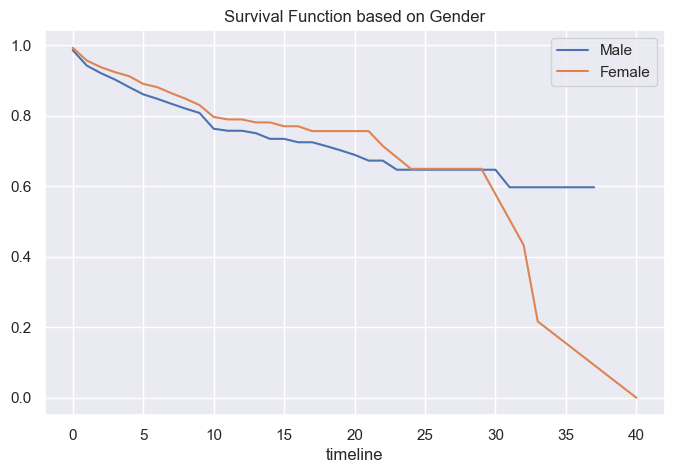

In [211]:
male = (dff2['Gender'] == 'Male')
female = (dff2['Gender'] == 'Female')

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=dff2[male]['YearsAtCompany'], event_observed=dff2[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=dff2[female]['YearsAtCompany'], event_observed=dff2[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Gender')
plt.show();

In [212]:
dff['YearsAtCompany'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

## <font color="teal" > Log-Rank Test

- <font color=#006699> Goal: Here, our goal is to see if there is any significant difference between the groups being compare

- <font color=#006699> Null Hypothesis: The null hypothesis states that there is no significant difference between the groups being studied. If there is a significant difference between these groups, then we have to reject our null hypothesis.

In [213]:

# Define logrank test
output = logrank_test(
durations_A = dff[male].YearsAtCompany,
durations_B = dff[female].YearsAtCompany,
event_observed_A = dff[male].Attrition,
event_observed_B = dff[female].Attrition)
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.79 0.18      2.47>

- Less than (5% = 0.05) P-value means that there is significant difference between the groups that we compared.

- <font color=#006699>  **p-value is greater than 0.05, we do reject the null hypothesis.** 
-<font color=#006699>  **In other words, we do not reject the hypothesis of male and female survival curves are identical**

In [214]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

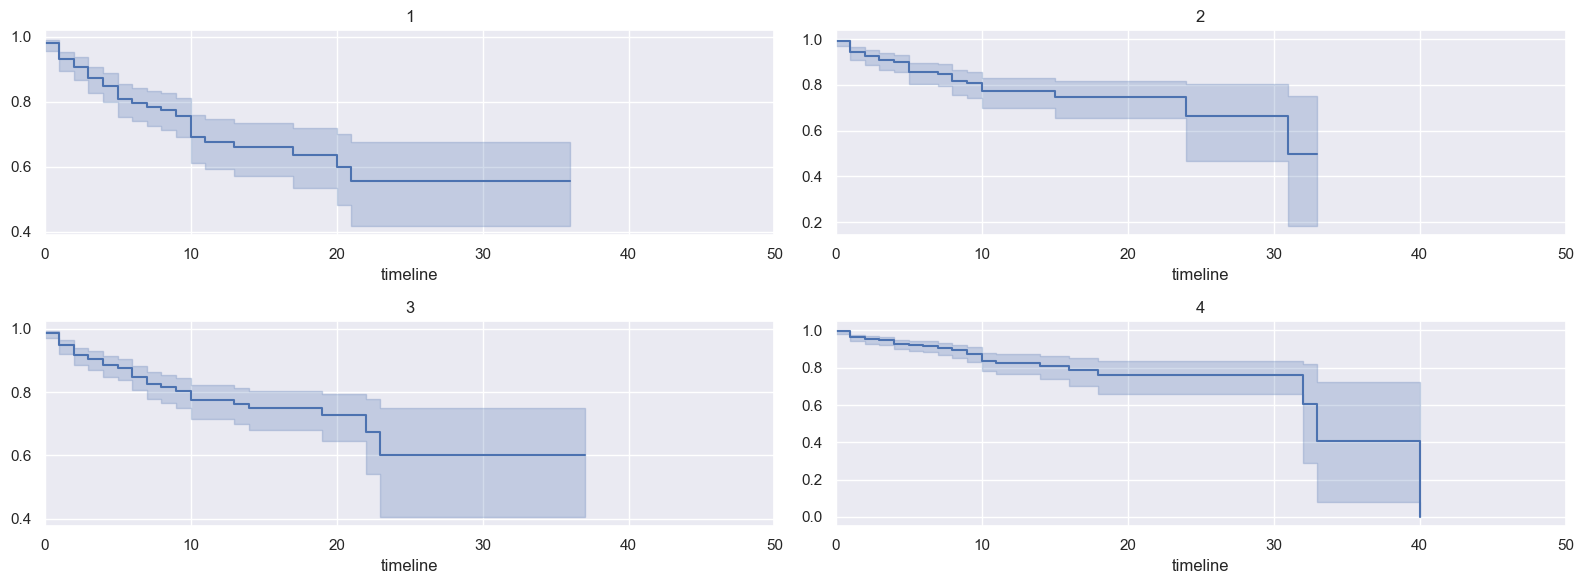

In [215]:
job= dff.sort_values(by=['JobSatisfaction'])['JobSatisfaction'].unique()

for i , job in enumerate(job):
    ax = plt.subplot(2,2,i+1)
    ix=dff['JobSatisfaction'] == job
    kmf.fit(T[ix],E[ix],label= job)
    kmf.plot_survival_function(ax=ax, legend=False)
    plt.title(job)
    plt.xlim(0,50)
    
plt.tight_layout()

-<font color=#006699>  **If Job satisfaction rating is 4 there is more chance of survival rate for employee**

-------------------------------------------------

# <font color="teal" > Nelson Aalen Estimate (Hazard Rate)

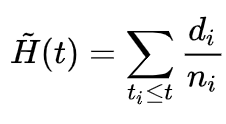
- with d{i} the number of events at t{i} and n{i} the total individuals at risk at t_{i}

In [216]:
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,44,16,28,1470,1470
1.0,171,59,112,0,1426
2.0,127,27,100,0,1255
3.0,128,20,108,0,1128
4.0,110,19,91,0,1000
5.0,196,21,175,0,890
6.0,76,9,67,0,694
7.0,90,11,79,0,618
8.0,80,9,71,0,528


- **Hazard Rate**
- H(0) = 16/1470 = 0.0108
- H(1) = 16/1470 + 59/1426 = 0.05217
- H(2) = 16/1470 + 59/1426 + 27/1255 = 0.0736

In [217]:

naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(dff['YearsAtCompany'],event_observed=dff['Attrition'])
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.010884
1.0,0.052259
2.0,0.073773
3.0,0.091503
4.0,0.110503
5.0,0.134099
6.0,0.147067
7.0,0.164866
8.0,0.181912


-<font color=#006699>  **As the working years at company increases failure rate too increases.**

<AxesSubplot: xlabel='timeline'>

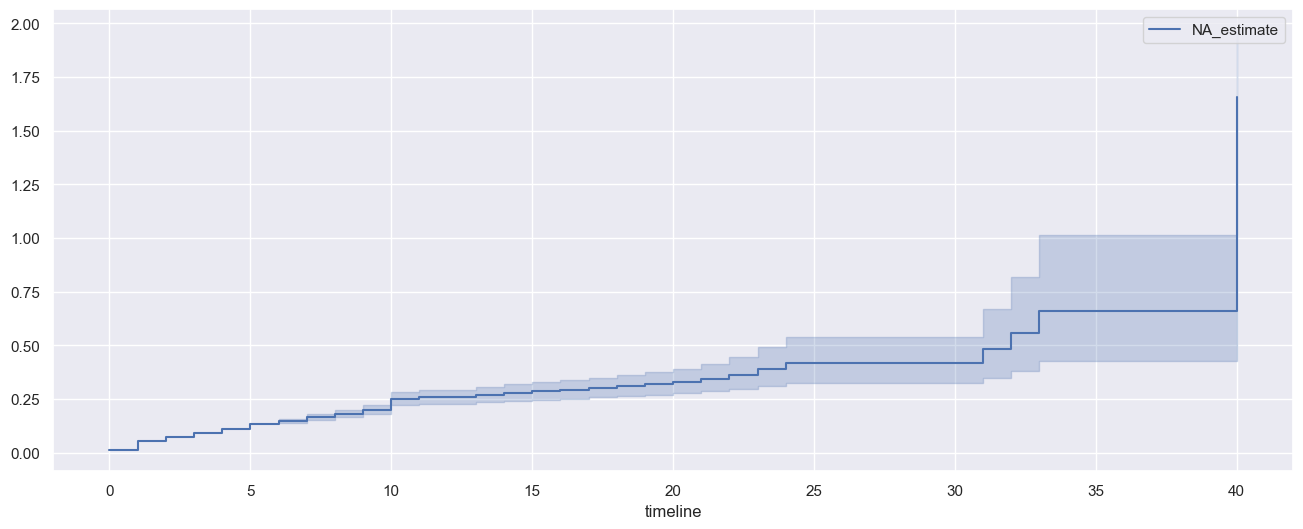

In [218]:
naf.plot_cumulative_hazard()

- <font color=#006699> **Separate Hazard Rate for each Gender**

In [219]:
dff2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [220]:
male1 = (dff2['Gender'] == 'Male')
female1 = (dff2['Gender'] == 'Female')

naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(durations=dff2[male1]['YearsAtCompany'], event_observed=dff2[male1]['Attrition'], label='Male')
naf_f.fit(durations=dff2[female1]['YearsAtCompany'], event_observed=dff2[female1]['Attrition'], label='Female')

<lifelines.NelsonAalenFitter:"Female", fitted with 588 total observations, 501 right-censored observations>

- **Cumulative hazard:**

In [221]:
naf_m.cumulative_hazard_

,Male
timeline,
0.0,0.013691
1.0,0.059235
2.0,0.082271
3.0,0.102059
4.0,0.126012
5.0,0.149520
6.0,0.164353
7.0,0.181137
8.0,0.197584


In [222]:
naf_f.cumulative_hazard_

,Female
timeline,
0.0,0.006820
1.0,0.044125
2.0,0.063947
3.0,0.079099
4.0,0.091384
5.0,0.115709
6.0,0.126199
7.0,0.145731
8.0,0.163872


- **Plot the data for cumulative hazard:**

<AxesSubplot: xlabel='timeline'>

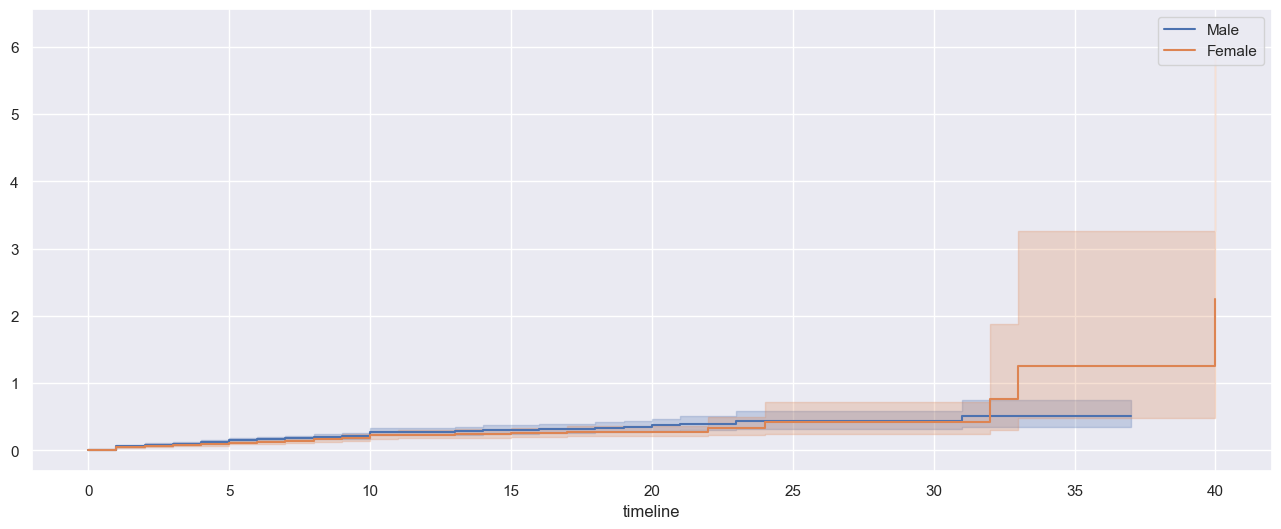

In [223]:
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()

# <font color="teal" > Fitting Cox Proportional Hazard Model

<img src ="cox.png">

- The Cox proportional hazard model is basically a regression model generally used by researchers to find out the relationship between the survival time of a subject and one or more predictor variables.
- Cox proportional hazard model(lifelines webpage)

cox proportional hazards regression model assumption includes:
- independence of survival times between distinct individuals in the sample,
- a multiplicative relationship between the predictors and the hazard , and
- A constant hazard ratio over time.This assumption implies that ,the hazard curves for the groups should be proportional and cannot cross

- The HR greater than 1 indicates that as the value of ith covariate increases, the event hazard increases, and thus the duration of survival decreases.
- HR = 1 : No effect
- HR < 1 : Reduction in the Hazard
- HR > 1 : Increase in Hazard

## <font color="teal" > Hazard and Hazard Ratio
-<font color=#006699>  Hazard is defined as the slope of the survival curve - a measure of how rapidly subjects are dying.
- the hazard ratio compares two treatments, if the hazard ratio is 2.0 , then the rate of deaths in one treatment group is twice the rate in the other group

In [224]:
dff.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [225]:
cat_col= list(dff.select_dtypes(['object']).columns)
cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [226]:
dff[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']]=dff[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']].apply(LabelEncoder().fit_transform)

In [227]:
dff.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [228]:
dff.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [229]:
dff=dff.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber','StockOptionLevel'],axis=1)

In [230]:
# Initialize and fit the model
coxph = CoxPHFitter()
coxph.fit(dff, duration_col='YearsAtCompany', event_col='Attrition')
# Print model summary
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1192.97
         time fit was run = 2023-05-24 07:25:12 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
Age                       -0.02       0.98       0.01            -0.04             0.00                 0.96                 1.00
BusinessTravel             0.08       1.09       0.10            -0.12             0.29                 0.89                 1.33
DailyRate                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Department                 0.80       2.23       0.22             0.38             1.23                 1.46                 3.41
DistanceFromHome           0.02       1.02       0.01             0.00             0.04                 1.00                 1.04
Education                  0.02       1.02       0.07            -0.11             0.15                 0.89                 1.16
EducationField             0.03       1.03       0.05            -0.07             0.13                 0.93                 1.13
EnvironmentSatisfaction   -0.31       0.74       0.06            -0.43            -0.18                 0.65                 0.83
Gender                     0.29       1.34       0.14             0.01             0.57                 1.01                 1.76
HourlyRate                 0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
JobInvolvement            -0.30       0.74       0.09            -0.47            -0.12                 0.62                 0.89
JobLevel                  -0.40       0.67       0.25            -0.88             0.08                 0.41                 1.08
JobRole                   -0.10       0.91       0.04            -0.18            -0.02                 0.84                 0.98
JobSatisfaction           -0.35       0.70       0.06            -0.48            -0.23                 0.62                 0.79
MaritalStatus              0.62       1.86       0.10             0.42             0.82                 1.52                 2.27
MonthlyIncome             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
MonthlyRate                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
NumCompaniesWorked         0.23       1.26       0.03             0.18             0.28                 1.19                 1.33
OverTime                   1.36       3.88       0.14             1.08             1.63                 2.95                 5.09
PercentSalaryHike         -0.01       0.99       0.03            -0.07             0.05                 0.94                 1.05
PerformanceRating          0.05       1.05       0.31            -0.56             0.66                 0.57                 1.93
RelationshipSatisfaction  -0.14       0.87       0.06            -0.27            -0.02                 0.77                 0.98
TotalWorkingYears         -0.16       0.86       0.03            -0.22            -0.10                 0.81                 0.91
TrainingTimesLastYear     -0.14       0.87       0.06            -0.25            -0.03                 0.78                 0.98
WorkLifeBalance           -0.20       0.82       0.09            -0.37            -0.03                 0.69                 0.97
YearsInCurrentRole        -0.31       0.74       0.03            -0.37            -0.24                 0.69       

- <font color=#006699> Here notice the p-value of different parameters as we know that a p-value (<0.05) is considered significant. 
- Here you can see that the p-value of **Department, DistanceFromHome ,EnvironmentSatisfaction ,Gender , JobInvolvement ,JobRole , JobSatisfaction , MaritalStatus , NumCompaniesWorked , OverTime , RelationshipSatisfaction , TrainingTimesLastYear ,  YearsInCurrentRole ,YearsWithCurrManager are <0.05.** So, we can say that we can group our data based on those parameters.

- <font color=#006699> The **p-value for OverTime is <0.005 and HR is 3.88,** indicating a strong relationship between the OverTime value and increased chance of Attrition.
- Now notice that HR for **Age is 0.98, which suggests only a 1% increase for the higher age group.** So we can say that there is no significant difference between different age groups.
- HR for **Job Level** is 0.67, which suggests indicating a weak relationship between the joblevel and increased chance of Attrition


### <font color="teal" > Check which factor affects the most from the graph:

<AxesSubplot: xlabel='log(HR) (95% CI)'>

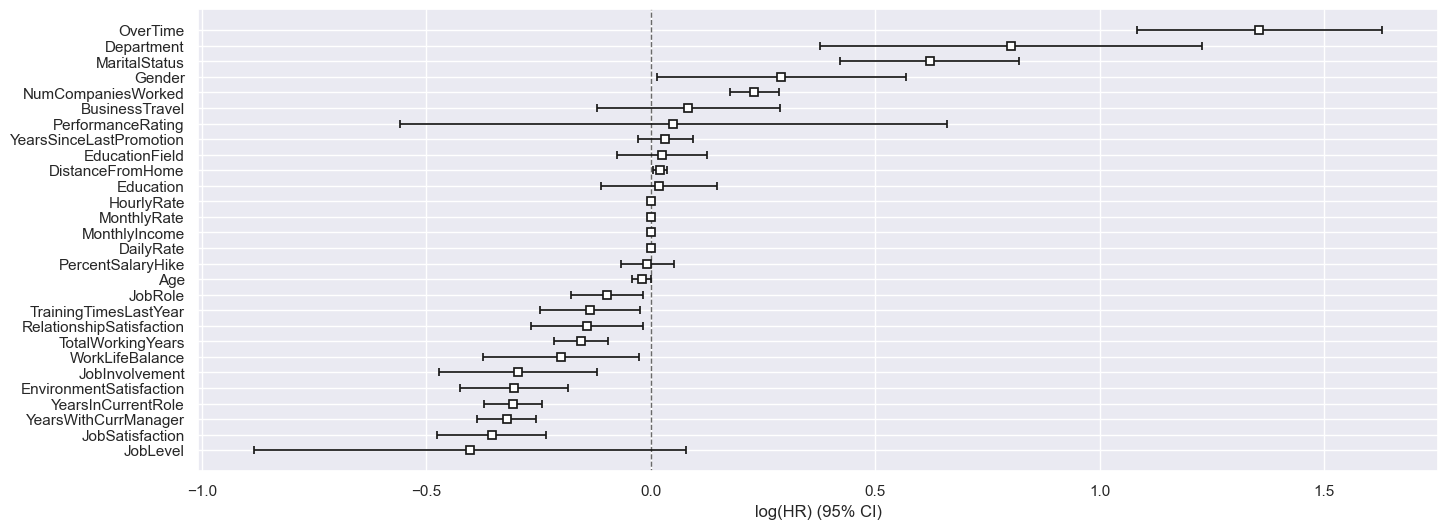

In [231]:
coxph.plot()

- You can clearly see that **Overtime and Joblevel** variables have significant differences.

##  <font color="teal" >Plot the graph coxph:

<AxesSubplot: >

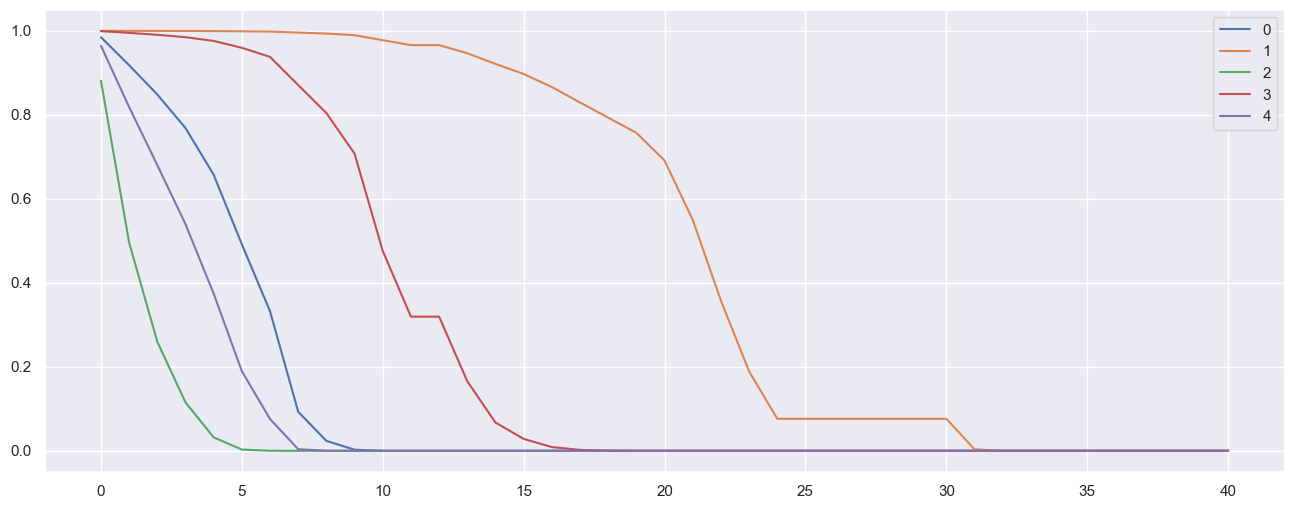

In [232]:
data =dff.iloc[0:5,:]
coxph.predict_survival_function(data).plot()

-<font color=#006699>  Plotted the survival probability for different persons in our dataset. 
- Here notice that **person-1 has the highest survival chances,and person-2 has the lowest survival chances in the company**.
- If you look at the main data, you can see that person-1 has a higher Department Position and have no over time in schedule.

- Here notice that  **person-2 , his/her survival probability is less since he/she has lower position in department with overtime work and less salary.

## <font color="teal" > Find out median time to event for timeline:

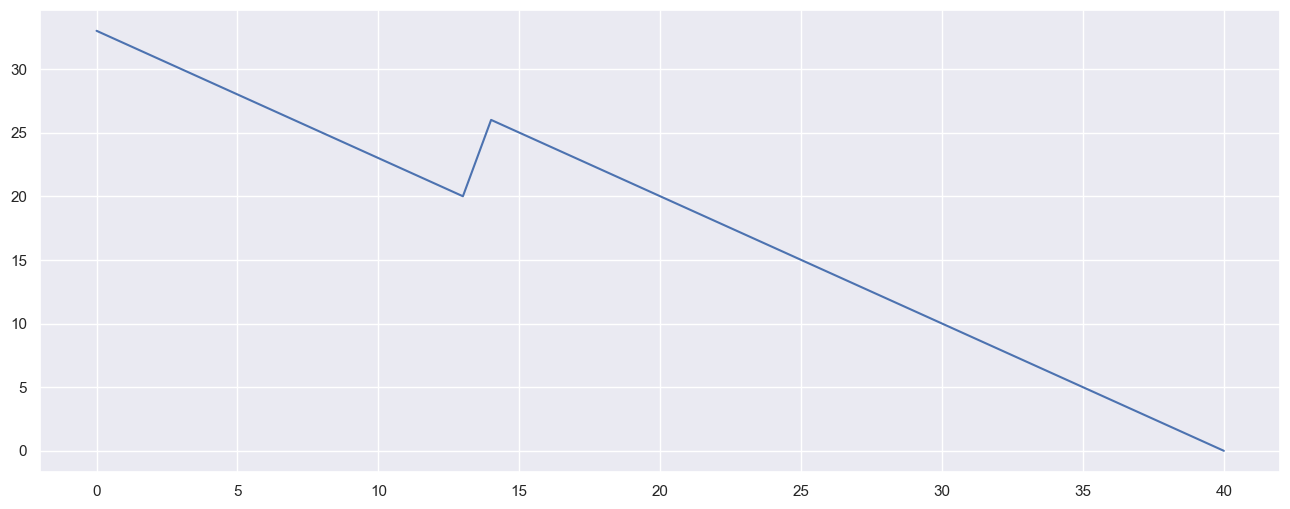

In [233]:
cte=kmf.conditional_time_to_event_
plt.plot(cte)

-<font color=#006699>  **As the number of days passed, the median survival time is decreasing**
- **The average survival time period for employee is 12 to 15 years.**

------------------------------------------------